In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import scipy
from matplotlib import pyplot as plt

In [ ]:
breakupdata = Path("../data/breakupdata/derived/breakupDate_cleaned.csv")
icedata = Path("../data/predictors/ice_thickness_POR_BobBusey.csv")
outdir = Path("../data/working/")

### Nenana only

In [ ]:
breakup = pd.read_csv(breakupdata, skiprows=3, index_col=0)
breakup = breakup[breakup.siteID=='Tanana River at Nenana']
ice = pd.read_csv(icedata).set_index('year')
ice.columns = ['thick']
ice

thick
year       
1989  42.00
1990  36.00
1991  38.00
1992  47.00
1993  26.00
1994  51.00
1995  34.00
1996  45.00
1997  42.50
1998  38.00
1999  46.00
2000  37.70
2001  38.80
2002  48.00
2003  48.20
2004  35.50
2005  32.00
2006  32.70
2007  48.80
2008  45.60
2009  46.00
2010  46.30
2011  41.10
2012  44.30
2013  49.30
2014  40.20
2015  33.30
2016  36.00
2017  39.15
2018  26.70
2019  25.30
2020  34.50
2021  45.20
2022  31.25
2023  30.80
2024  49.00

In [ ]:
breakup = breakup[['year', 'JulianDay']].set_index('year')
breakup

JulianDay
year           
2023        128
2022        122
2021        120
2020        118
2019        104
2018        121
2017        121
2016        114
2015        114
2014        115
2013        140
2012        114
2011        124
2010        119
2009        121
2008        127
2007        117
2006        127
2005        118
2004        115
2003        119
2002        127
2001        128
2000        122
1999        119
1998        110
1997        120
1996        127
1995        116
1994        119
1993        114
1992        135
1991        121
1990        114
1989        121
1988        118
1987        125
1986        128
1985        131
1984        130
1983        119
1982        130
1981        120
1980        120

<AxesSubplot: xlabel='Year', ylabel='thick'>

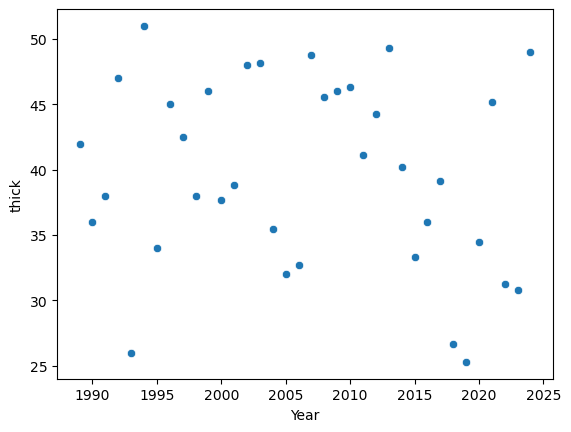

In [ ]:
sns.scatterplot(data=ice, x='year', y='thick', )

Text(0.05, 0.95, 'slope=0.40±0.15, R^2 = 0.169, p = 0.000201')

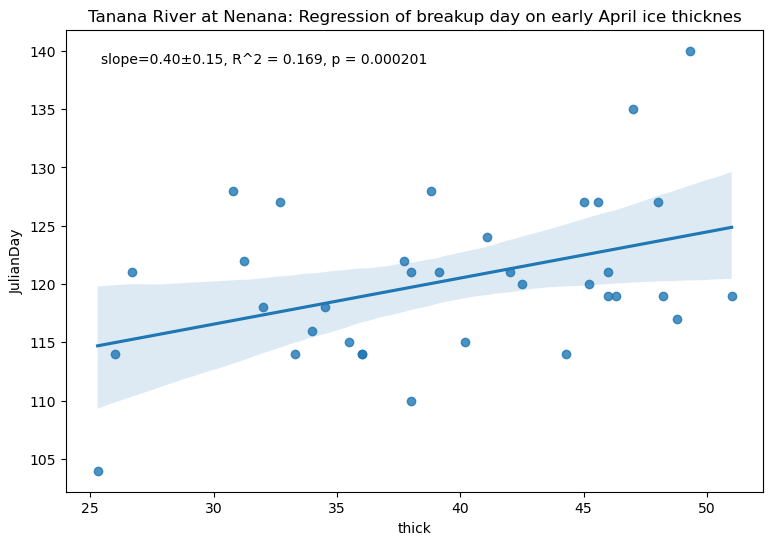

In [ ]:
fig = plt.figure(figsize=(9, 6))
sns.regplot(data=breakup.join(ice).dropna(), x='thick', y='JulianDay')
plt.title("Tanana River at Nenana: Regression of breakup day on early April ice thicknes")
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    breakup.join(ice).dropna()['thick'], breakup.join(ice).dropna()['JulianDay'])
ax = plt.gca()
plt.text(.05, .95, f"slope={slope:.2f}±{std_err:.2f}, R^2 = {r_value**2:.3f}, p = {p_value**2:.6f}",
         ha='left', va='top', transform=ax.transAxes)


### All sites

In [ ]:
breakup = pd.read_csv(breakupdata, skiprows=3, index_col=0)
ice = pd.read_csv(icedata).set_index('year')

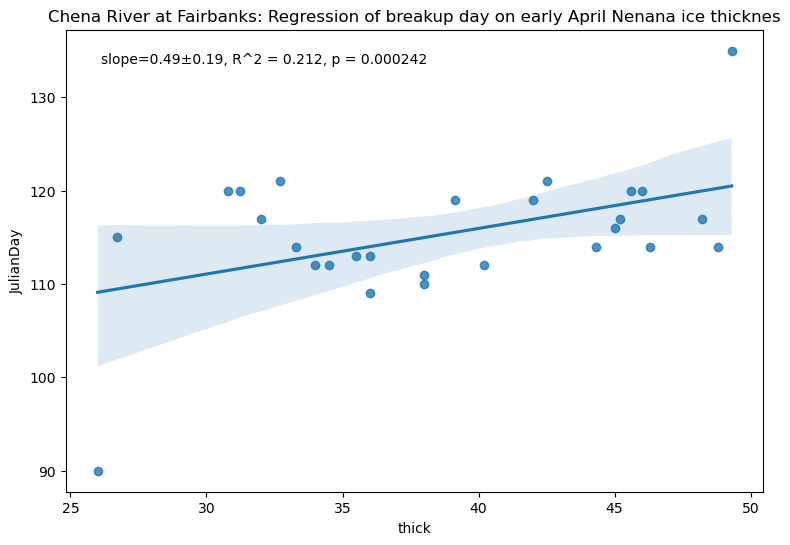

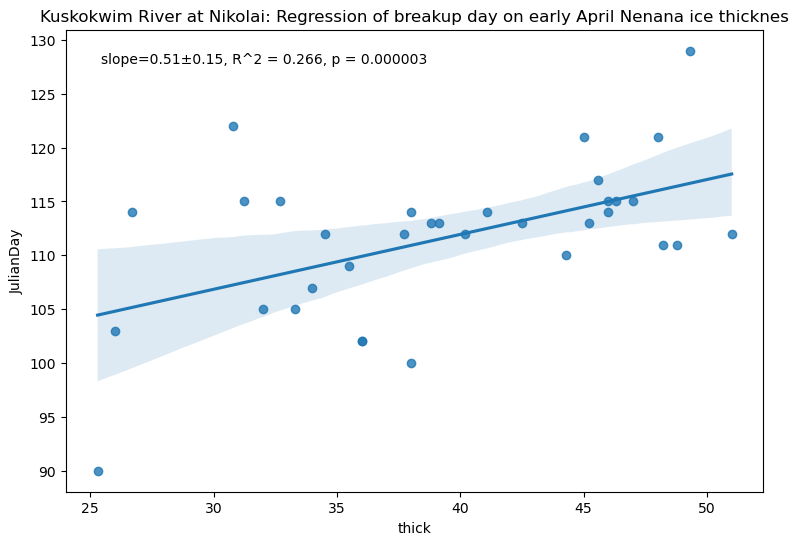

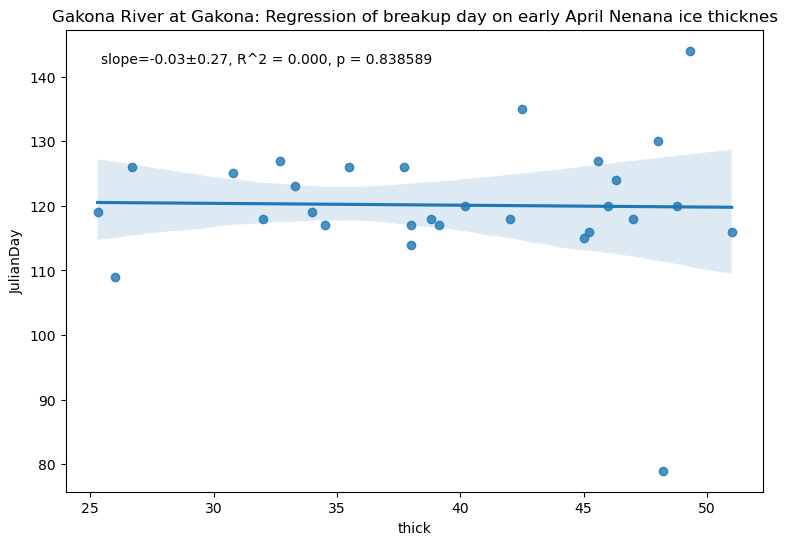

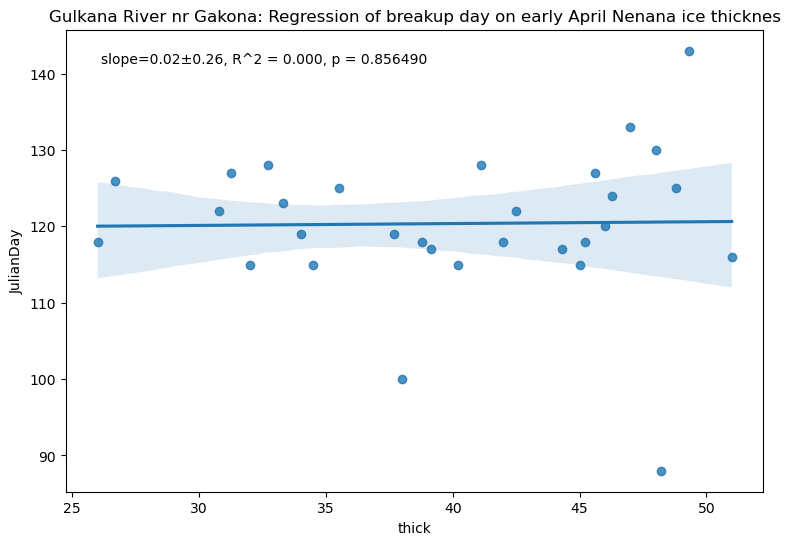

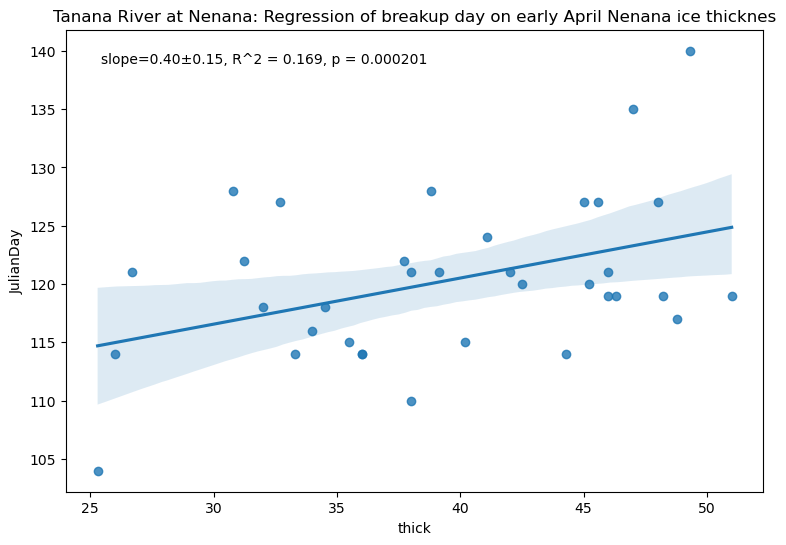

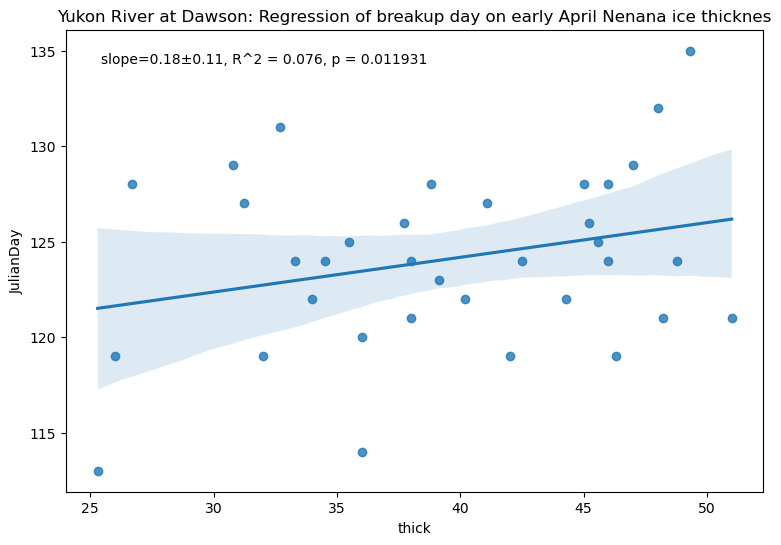

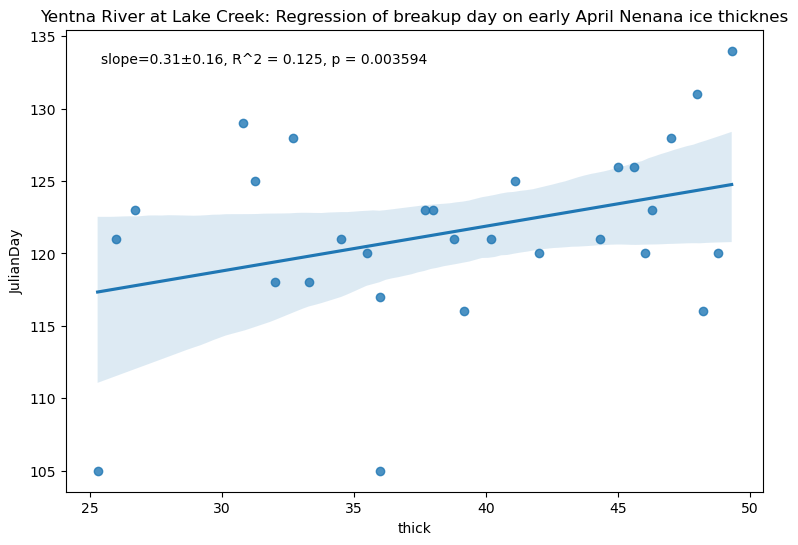

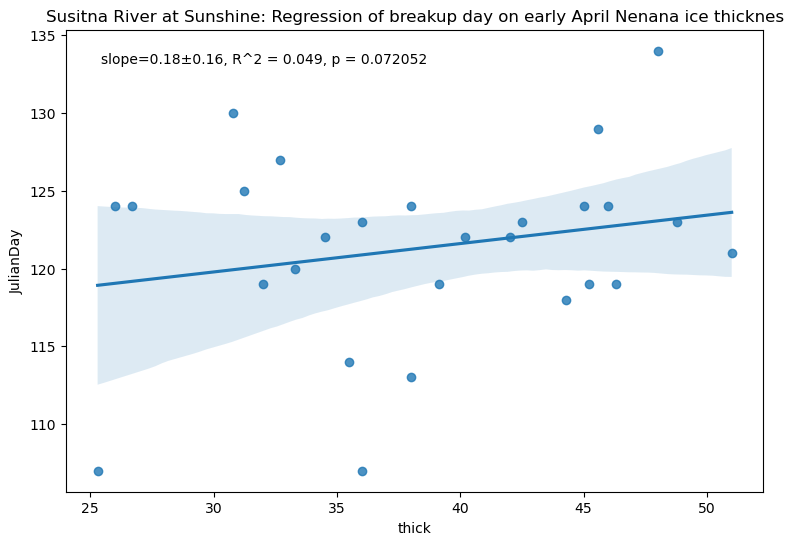

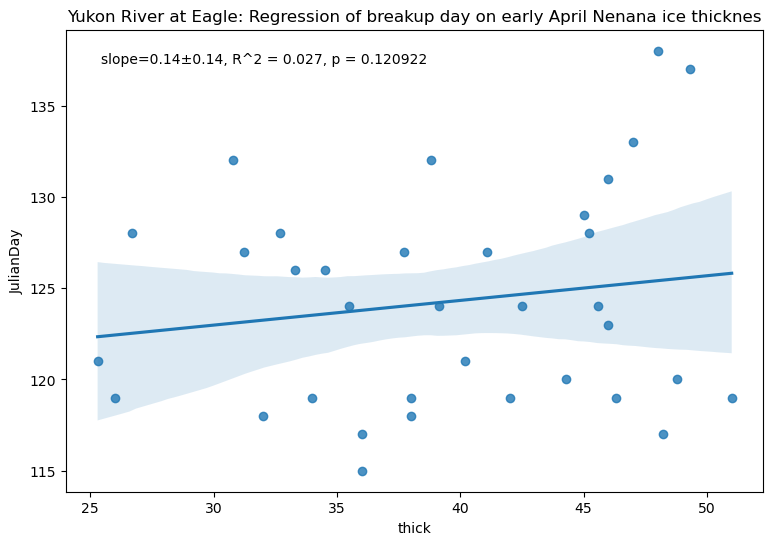

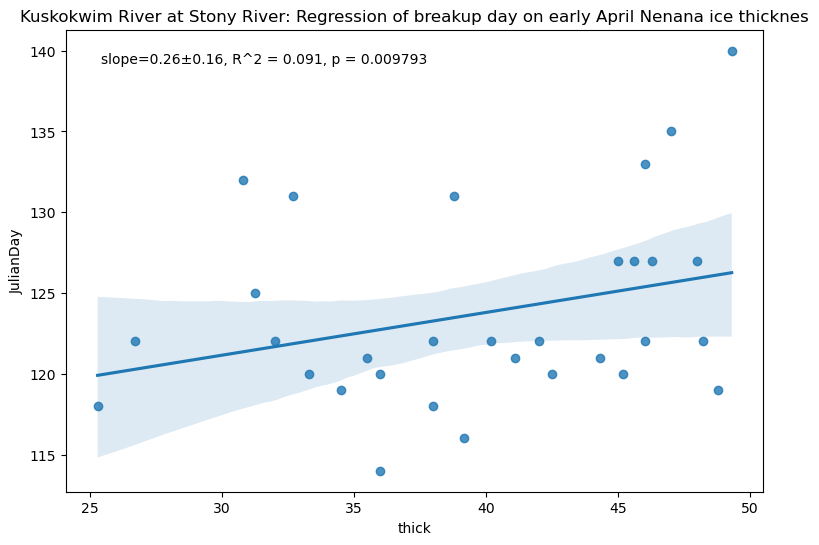

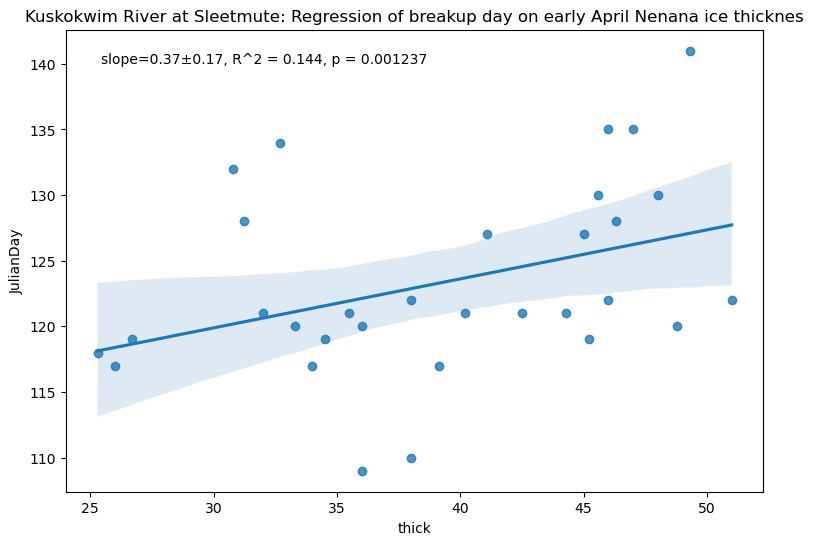

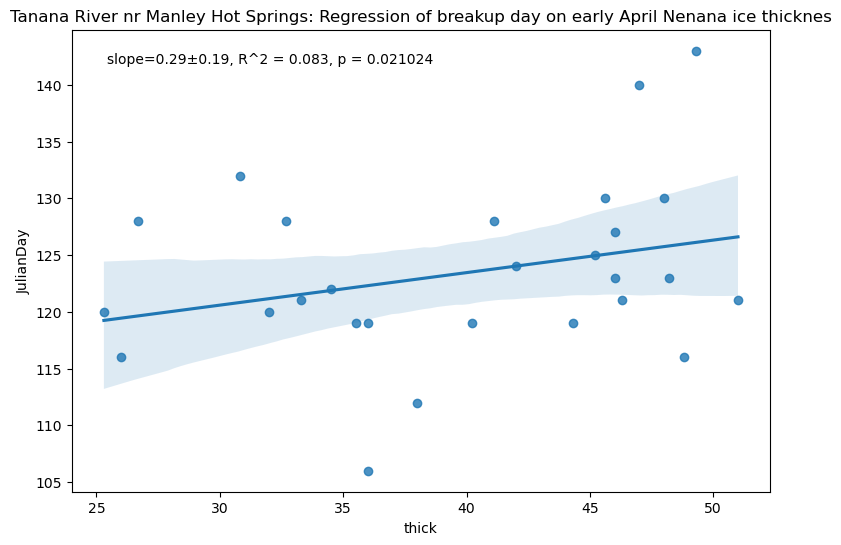

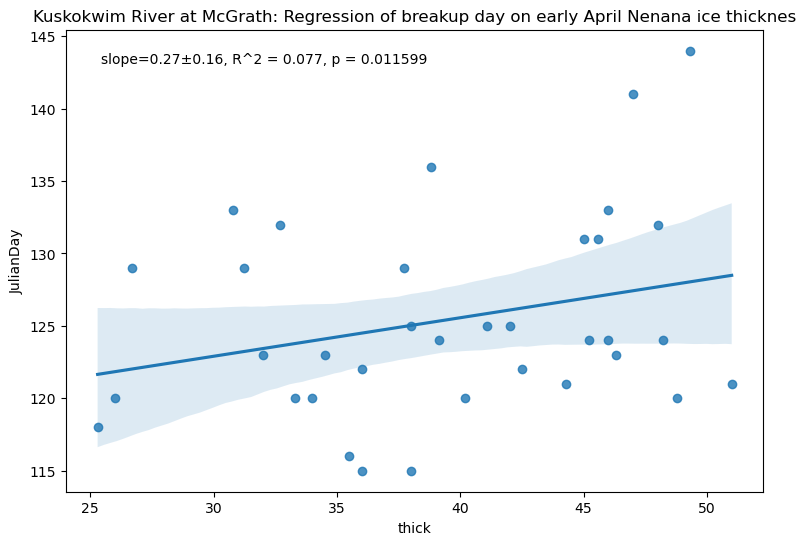

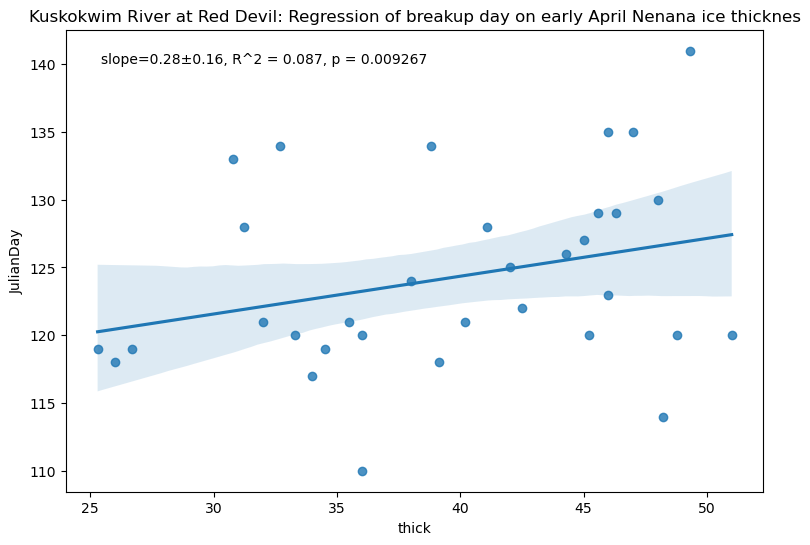

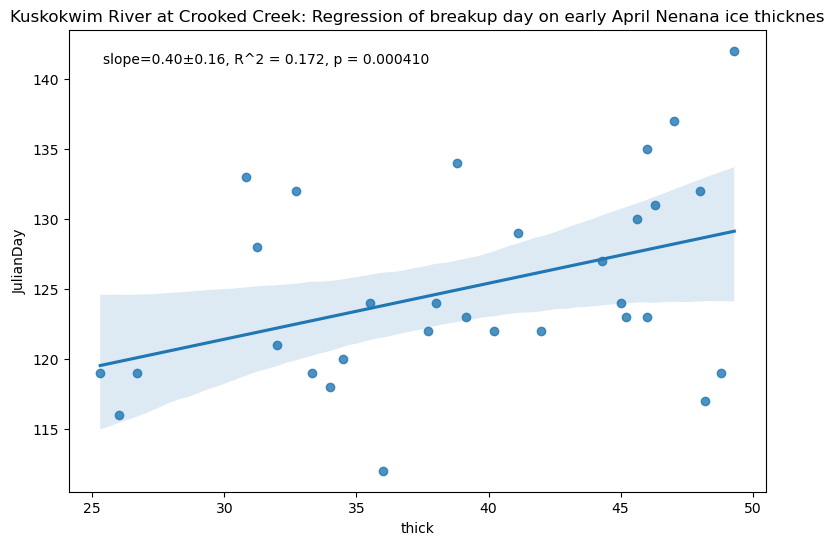

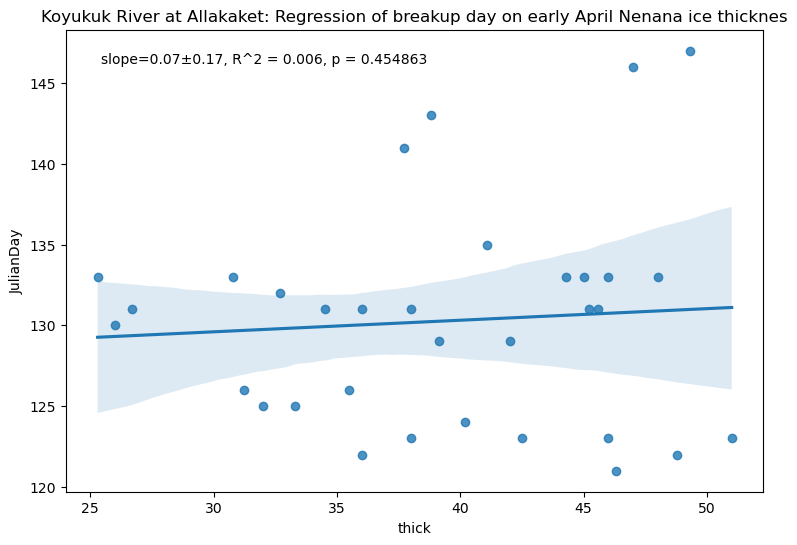

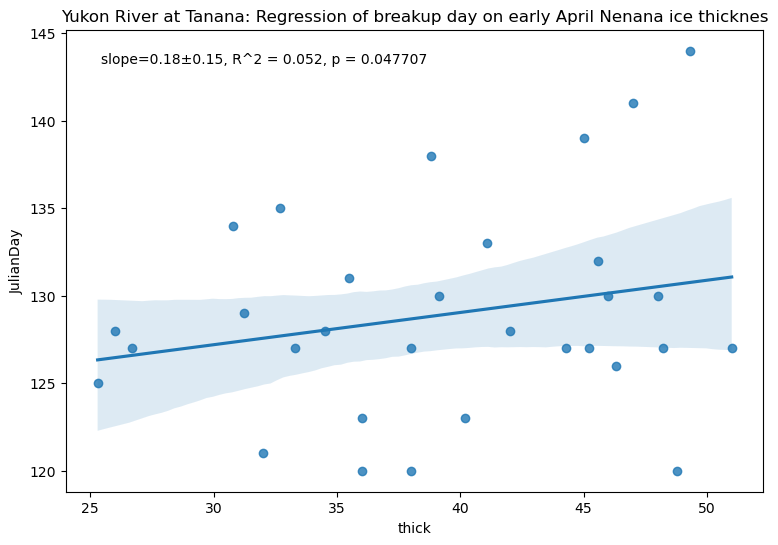

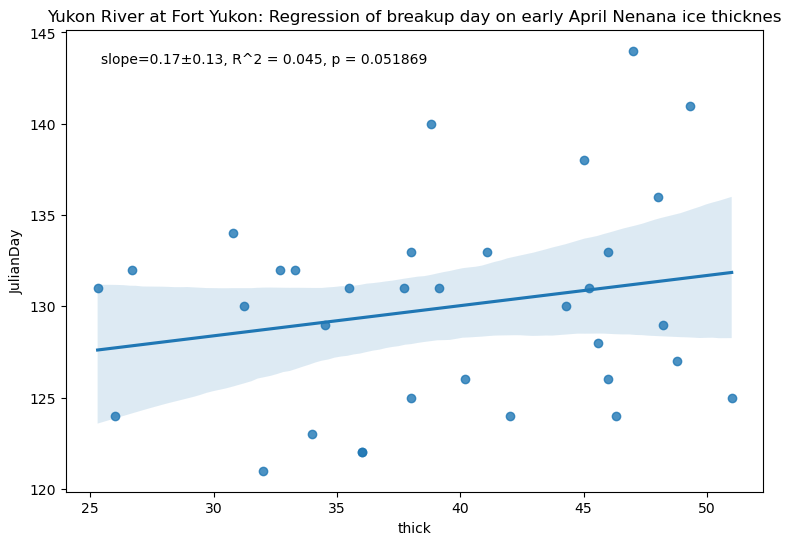

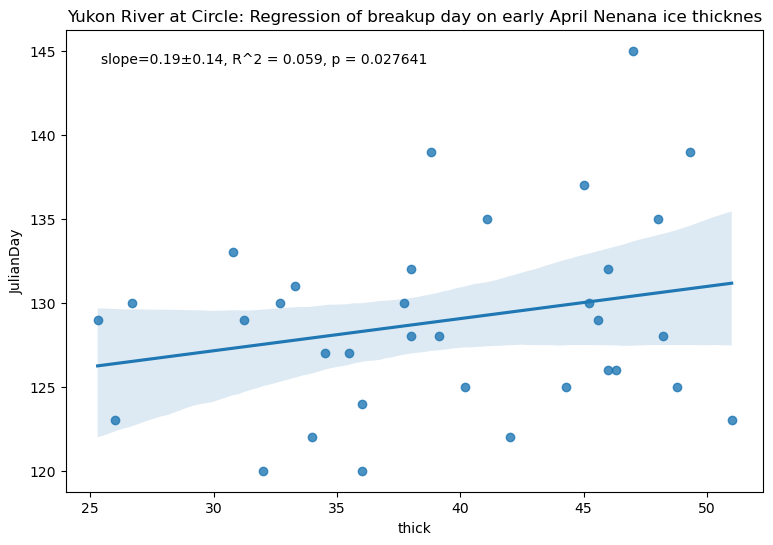

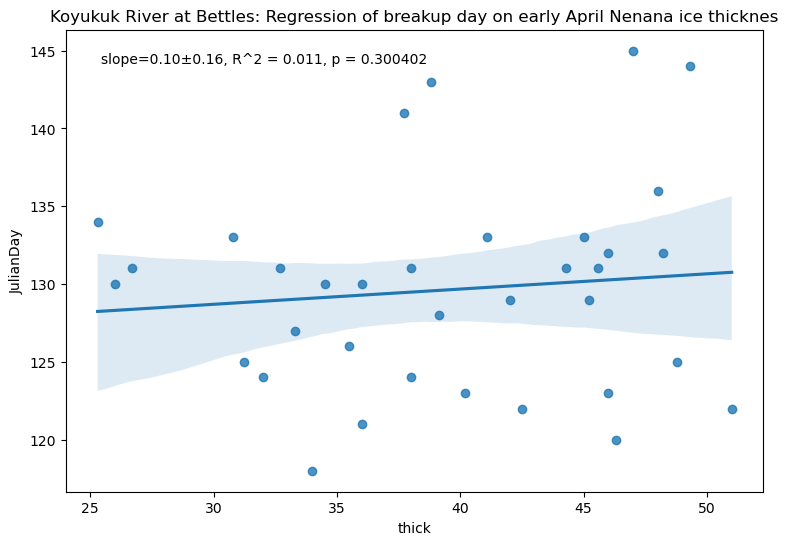

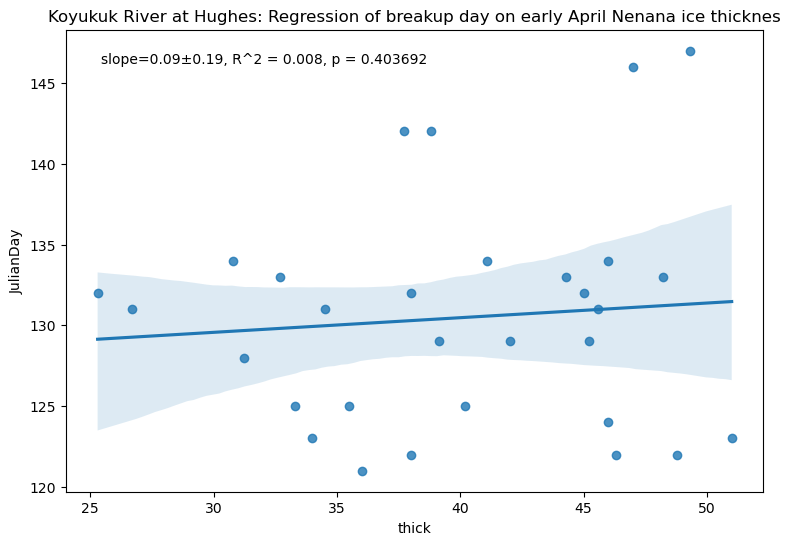

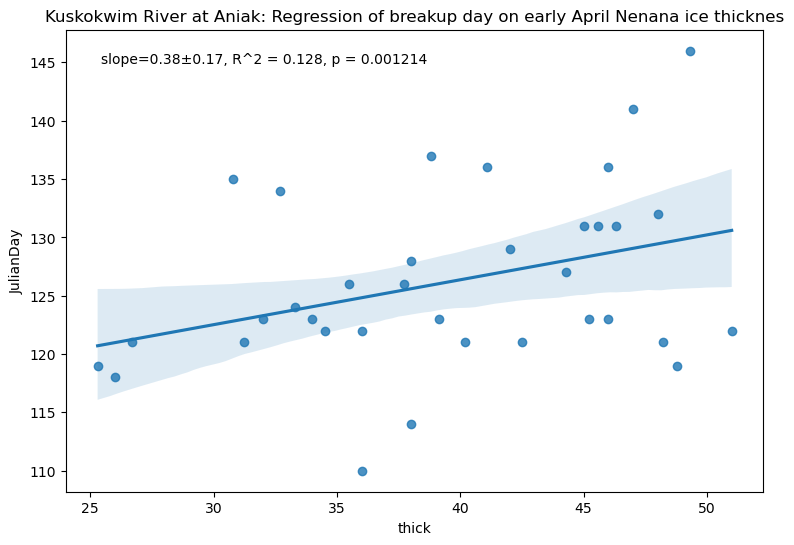

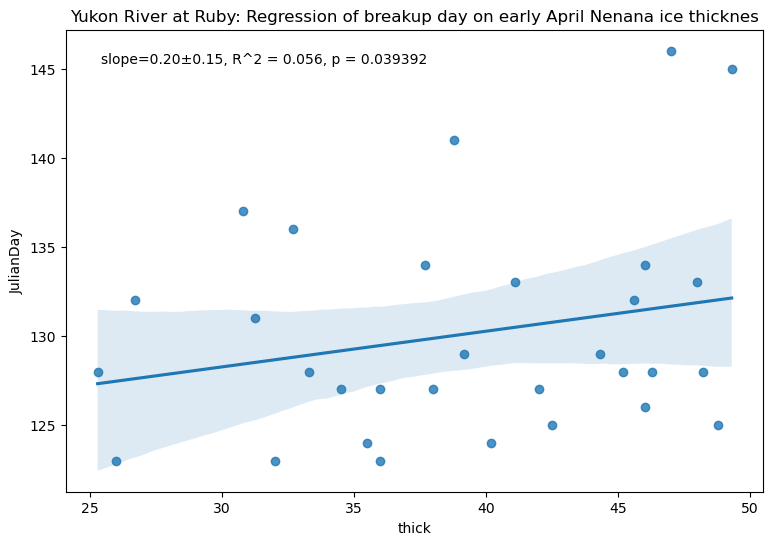

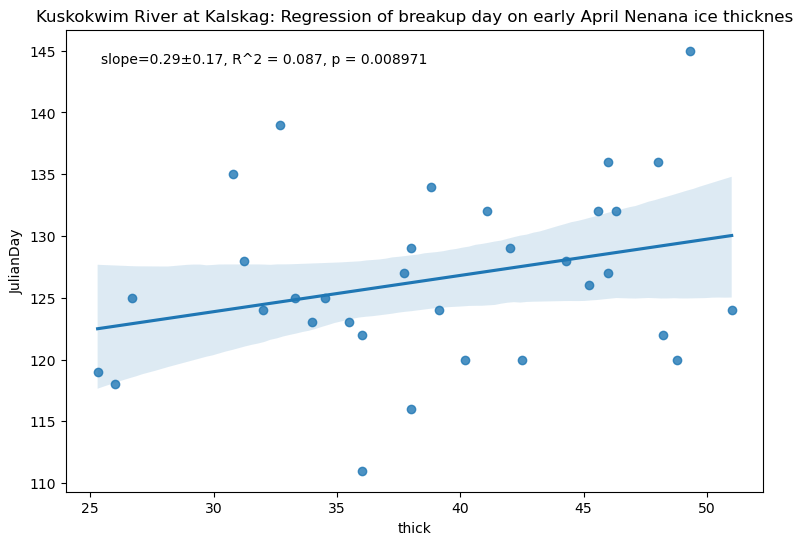

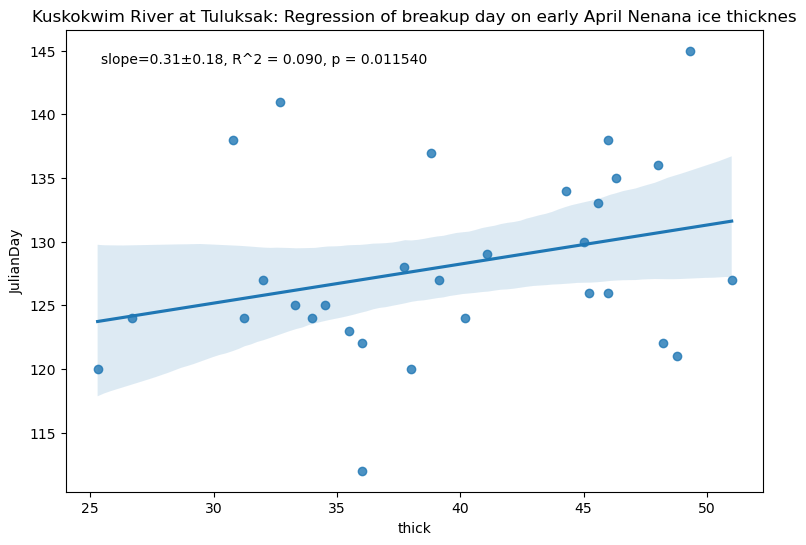

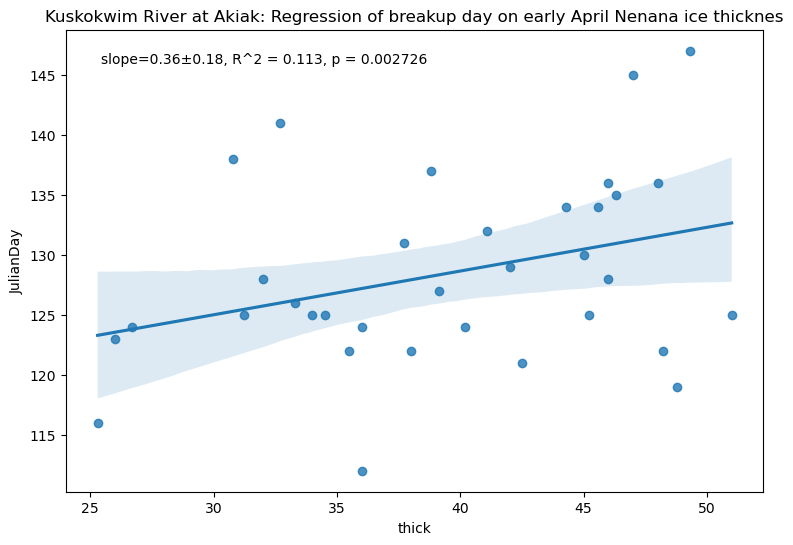

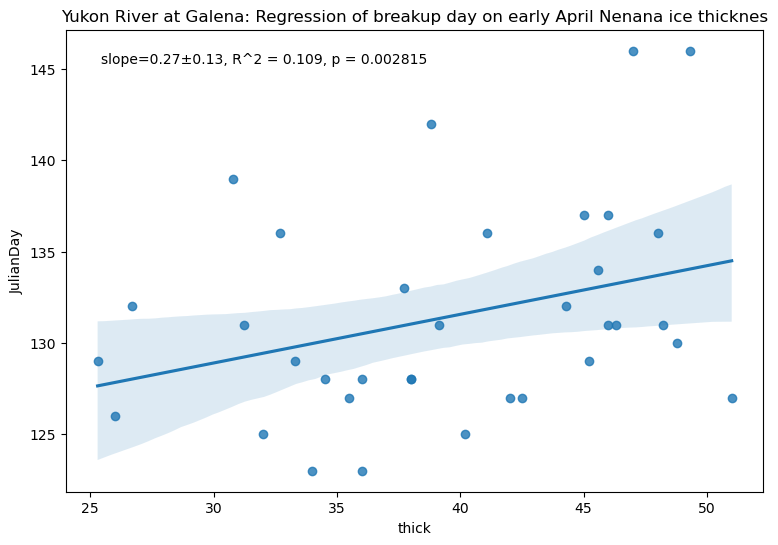

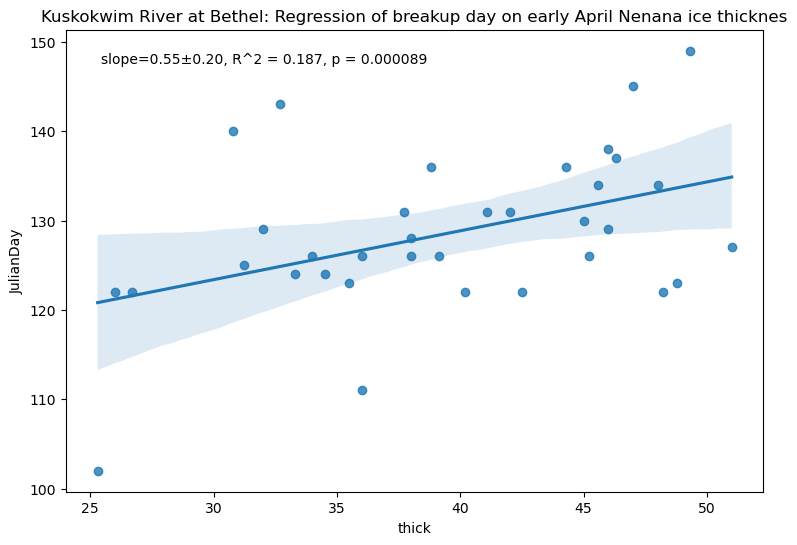

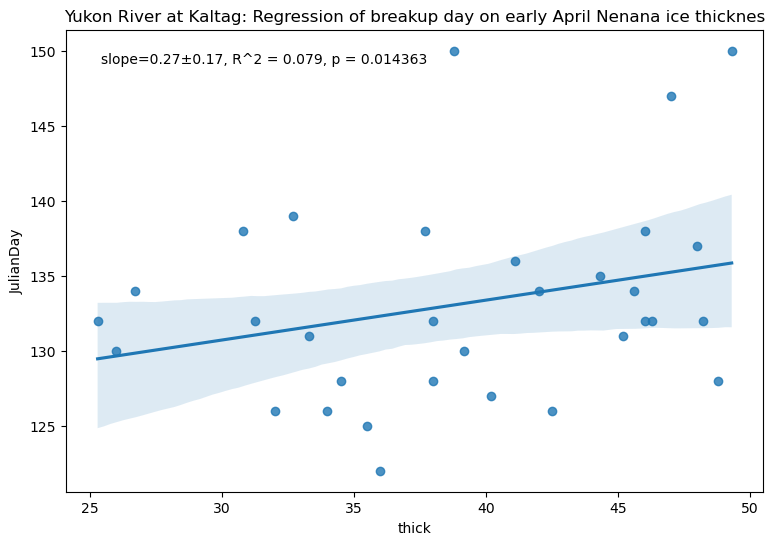

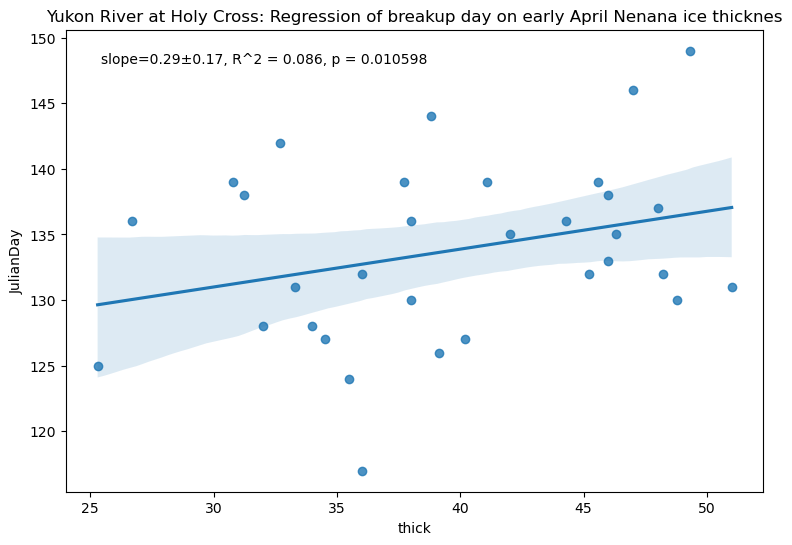

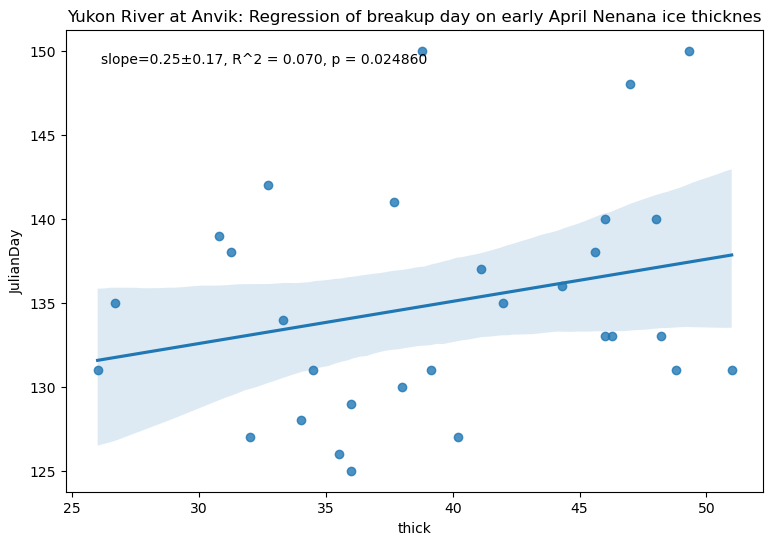

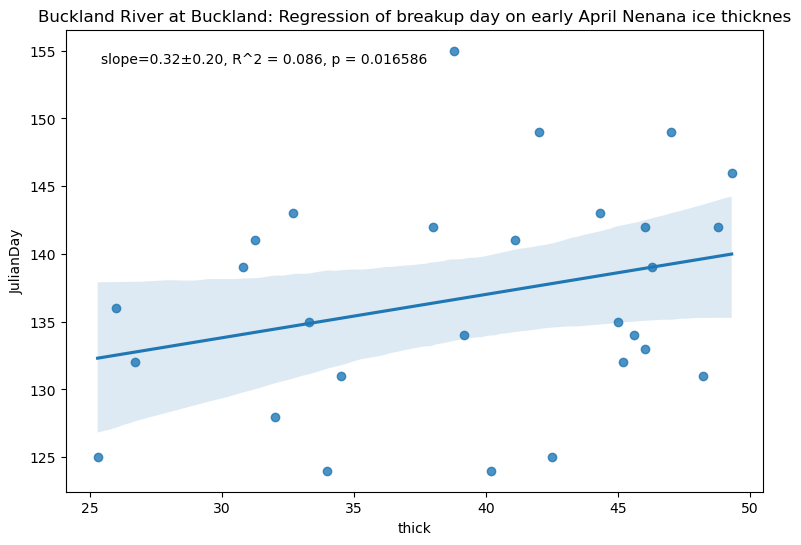

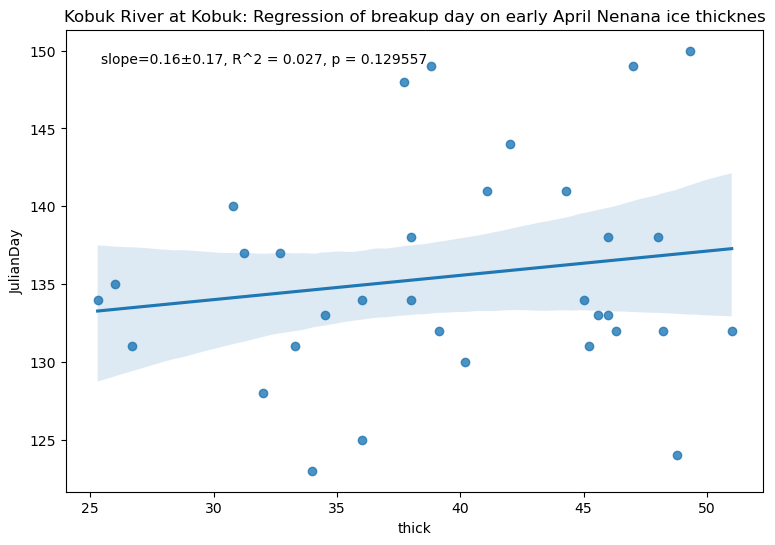

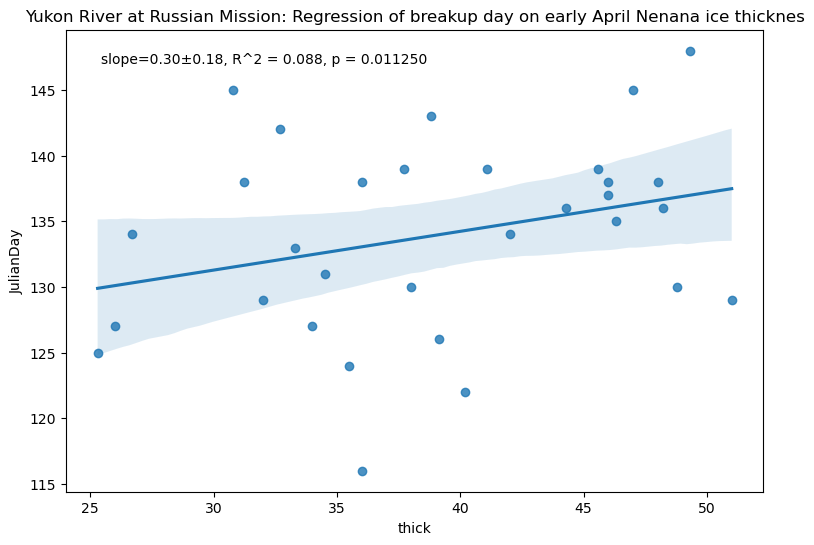

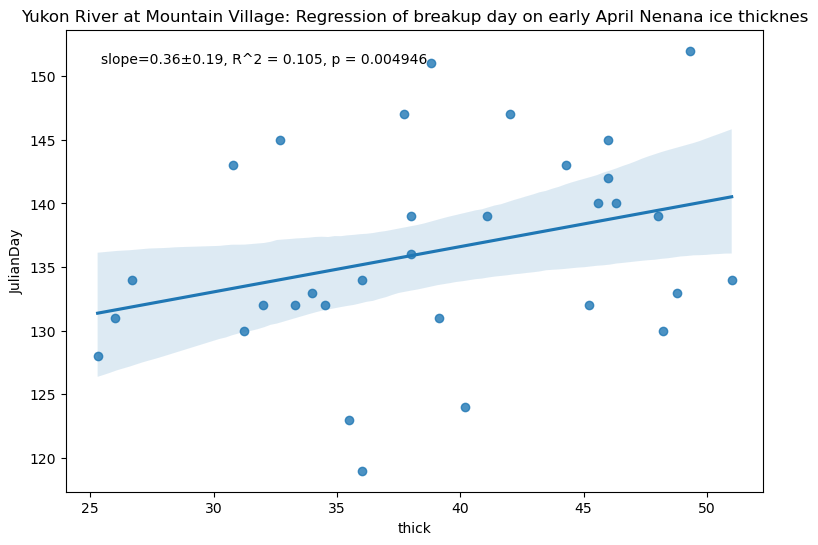

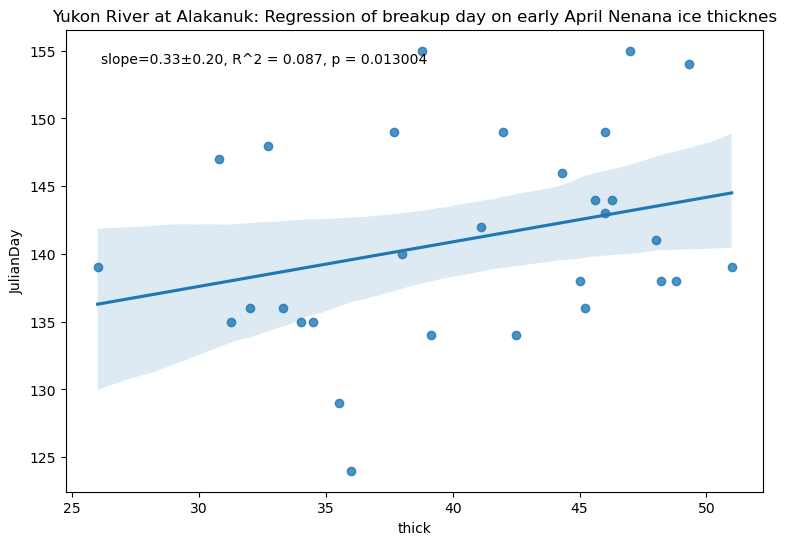

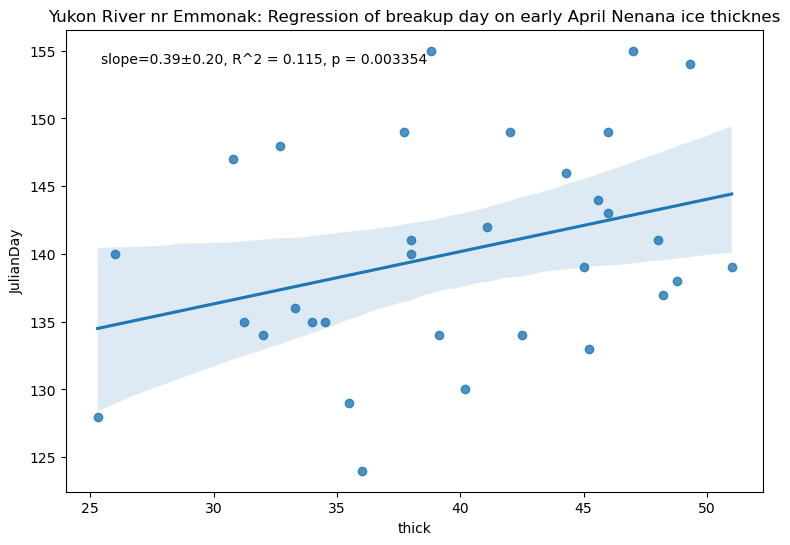

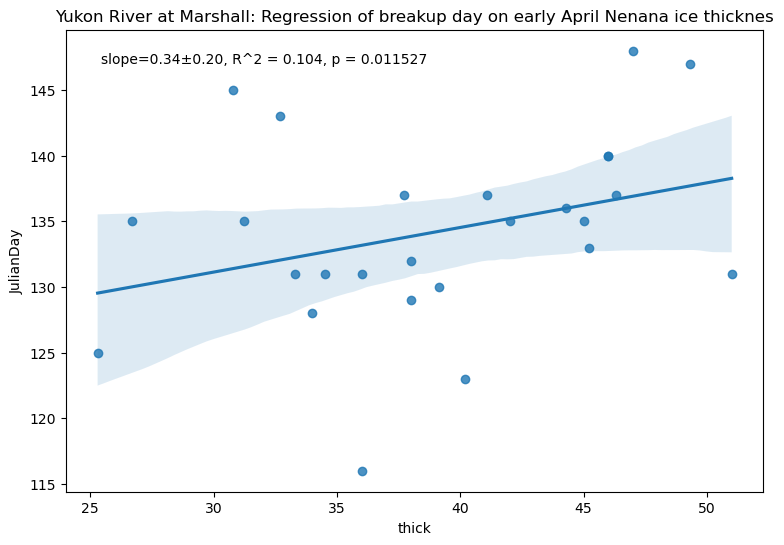

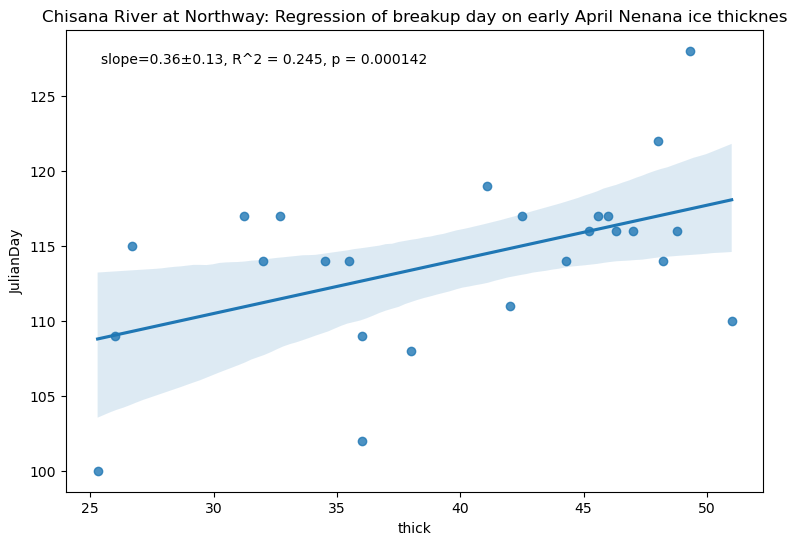

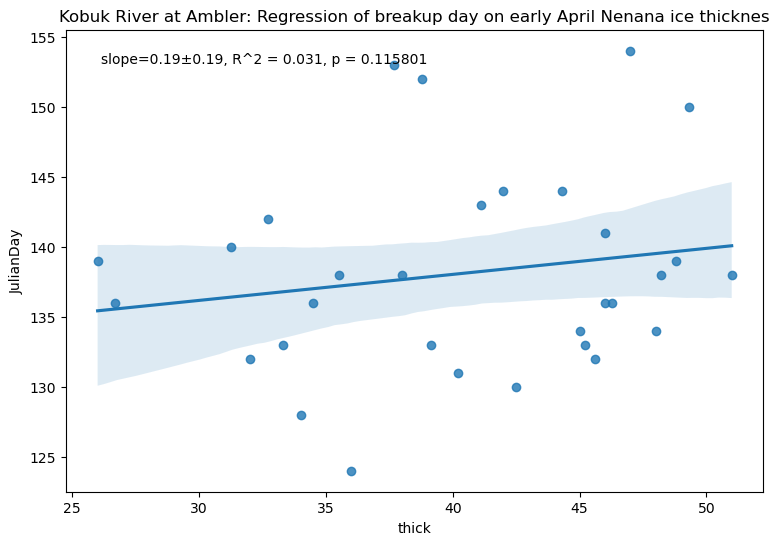

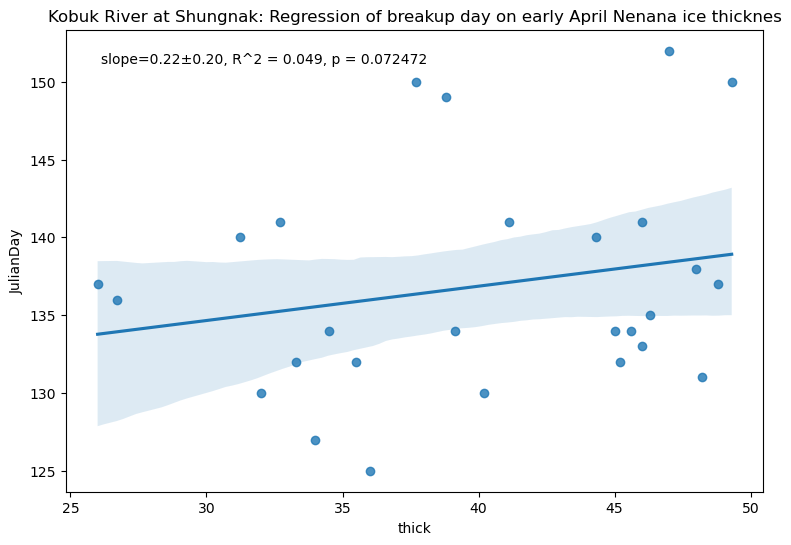

In [ ]:
results = []

for loc in breakup.siteID.unique():
    brk = breakup.copy()
    brk = brk[brk.siteID==loc]
    brk = brk[['year', 'JulianDay']].set_index('year')

    fig = plt.figure(figsize=(9, 6))
    sns.regplot(data=brk.join(ice).dropna(), x='thick', y='JulianDay')
    plt.title(f"{loc}: Regression of breakup day on early April Nenana ice thicknes")
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
        brk.join(ice).dropna()['thick'], brk.join(ice).dropna()['JulianDay'])
    ax = plt.gca()
    plt.text(.05, .95, f"slope={slope:.2f}±{std_err:.2f}, R^2 = {r_value**2:.3f}, p = {p_value**2:.6f}",
         ha='left', va='top', transform=ax.transAxes)
    plt.show()

    results.append({
        "location": loc,
        "slope": slope,
        "R2":  r_value**2,
        "r_value":  r_value,
        "p_value": p_value,
        "std_err": std_err
    })

In [ ]:
pd.DataFrame.from_records(results)

location     slope        R2   r_value  \
0             Chena River at Fairbanks  0.488940  0.212343  0.460807   
1           Kuskokwim River at Nikolai  0.509758  0.265605  0.515369   
2               Gakona River at Gakona -0.028885  0.000422 -0.020547   
3              Gulkana River nr Gakona  0.024419  0.000318  0.017836   
4               Tanana River at Nenana  0.395276  0.168954  0.411041   
5                Yukon River at Dawson  0.181837  0.075882  0.275467   
6           Yentna River at Lake Creek  0.309231  0.124960  0.353498   
7            Susitna River at Sunshine  0.182590  0.048748  0.220789   
8                 Yukon River at Eagle  0.135239  0.026760  0.163586   
9       Kuskokwim River at Stony River  0.264775  0.091071  0.301781   
10        Kuskokwim River at Sleetmute  0.373500  0.144114  0.379624   
11  Tanana River nr Manley Hot Springs  0.286472  0.083018  0.288129   
12          Kuskokwim River at McGrath  0.266093  0.076517  0.276616   
13        Kuskokwim River at Red Devil  0.279002  0.086688  0.294428   
14    Kuskokwim River at Crooked Creek  0.399819  0.172240  0.415018   
15          Koyukuk River at Allakaket  0.071740  0.005768  0.075947   
16               Yukon River at Tanana  0.184277  0.051749  0.227484   
17           Yukon River at Fort Yukon  0.165264  0.045128  0.212433   
18               Yukon River at Circle  0.191513  0.059012  0.242925   
19            Koyukuk River at Bettles  0.097967  0.011037  0.105058   
20             Koyukuk River at Hughes  0.090727  0.008142  0.090231   
21            Kuskokwim River at Aniak  0.384861  0.128003  0.357776   
22                 Yukon River at Ruby  0.200313  0.056356  0.237394   
23          Kuskokwim River at Kalskag  0.293616  0.087466  0.295746   
24         Kuskokwim River at Tuluksak  0.306833  0.089913  0.299855   
25            Kuskokwim River at Akiak  0.364437  0.112737  0.335763   
26               Yukon River at Galena  0.266527  0.108736  0.329752   
27           Kuskokwim River at Bethel  0.546752  0.187205  0.432672   
28               Yukon River at Kaltag  0.266112  0.078719  0.280570   
29           Yukon River at Holy Cross  0.288461  0.086179  0.293562   
30                Yukon River at Anvik  0.250848  0.070007  0.264588   
31          Buckland River at Buckland  0.320290  0.086473  0.294063   
32                Kobuk River at Kobuk  0.156071  0.027100  0.164621   
33      Yukon River at Russian Mission  0.295424  0.087547  0.295883   
34     Yukon River at Mountain Village  0.355928  0.105056  0.324124   
35             Yukon River at Alakanuk  0.328578  0.086788  0.294597   
36              Yukon River nr Emmonak  0.386138  0.114728  0.338716   
37             Yukon River at Marshall  0.340188  0.104413  0.323129   
38           Chisana River at Northway  0.361030  0.244812  0.494785   
39               Kobuk River at Ambler  0.185867  0.031396  0.177189   
40             Kobuk River at Shungnak  0.220687  0.048593  0.220438   

     p_value   std_err  
0   0.015563  0.188337  
1   0.001813  0.149843  
2   0.915745  0.270487  
3   0.925468  0.258692  
4   0.014169  0.152606  
5   0.109231  0.110464  
6   0.059950  0.157481  
7   0.268425  0.161315  
8   0.347738  0.141974  
9   0.098960  0.155329  
10  0.035172  0.169023  
11  0.144996  0.190417  
12  0.107700  0.160921  
13  0.096263  0.162651  
14  0.020256  0.162761  
15  0.674435  0.169165  
16  0.218420  0.146482  
17  0.227747  0.134386  
18  0.166255  0.135189  
19  0.548090  0.161429  
20  0.635368  0.189246  
21  0.034844  0.174861  
22  0.198474  0.152210  
23  0.094714  0.170335  
24  0.107424  0.184482  
25  0.052214  0.180734  
26  0.053054  0.132831  
27  0.009432  0.198319  
28  0.119844  0.166210  
29  0.102948  0.171497  
30  0.157669  0.172783  
31  0.128787  0.204163  
32  0.359940  0.167954  
33  0.106066  0.177106  
34  0.070330  0.189666  
35  0.114035  0.201426  
36  0.057918  0.195832  
37  0.107366  0.203372  
38  0.011921  0.132218  
39  0

In [ ]:
with open(outdir / "corr_IceThickNenana_breakupdate.csv", "w") as dst:
    dst.write(f"# Correlations from linear regression between last Nenana ice thickness and breakupdate \n")
    dst.write("# Data sent by Bob Busey, after Nenana Ice Classic site (cleaned up)\n")
    dst.write("# \n")
    pd.DataFrame.from_records(results).to_csv(dst)



### With detrending

In [ ]:
ice = pd.read_csv(icedata).set_index('year')
ice['thick'] = scipy.signal.detrend(ice.thick, type='linear')
ice

thick
year           
1989  -0.514524
1990  -6.336695
1991  -4.158866
1992   5.018964
1993 -15.803207
1994   9.374622
1995  -7.447549
1996   3.730280
1997   1.408109
1998  -2.914062
1999   5.263768
2000  -2.858403
2001  -1.580574
2002   7.797255
2003   8.175084
2004  -4.347087
2005  -7.669258
2006  -6.791429
2007   9.486401
2008   6.464230
2009   7.042059
2010   7.519888
2011   2.497717
2012   5.875546
2013  11.053375
2014   2.131204
2015  -4.590966
2016  -1.713137
2017   1.614692
2018 -10.657479
2019 -11.879650
2020  -2.501821
2021   8.376008
2022  -5.396162
2023  -5.668333

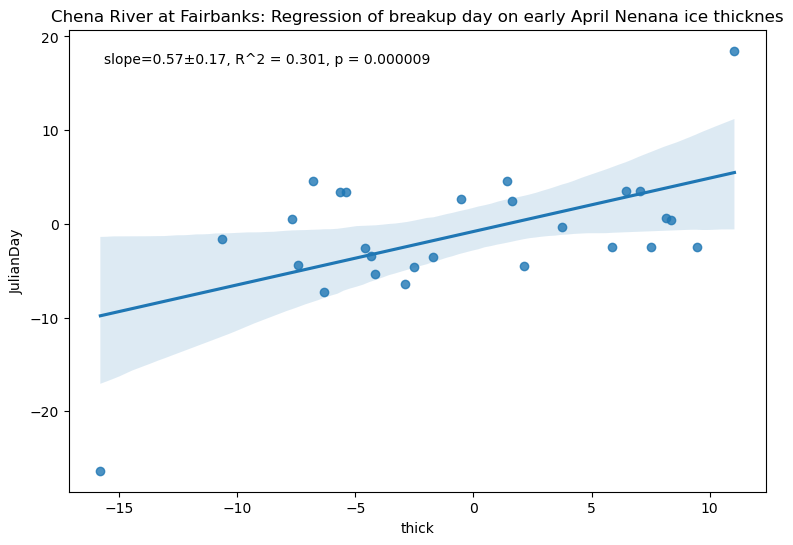

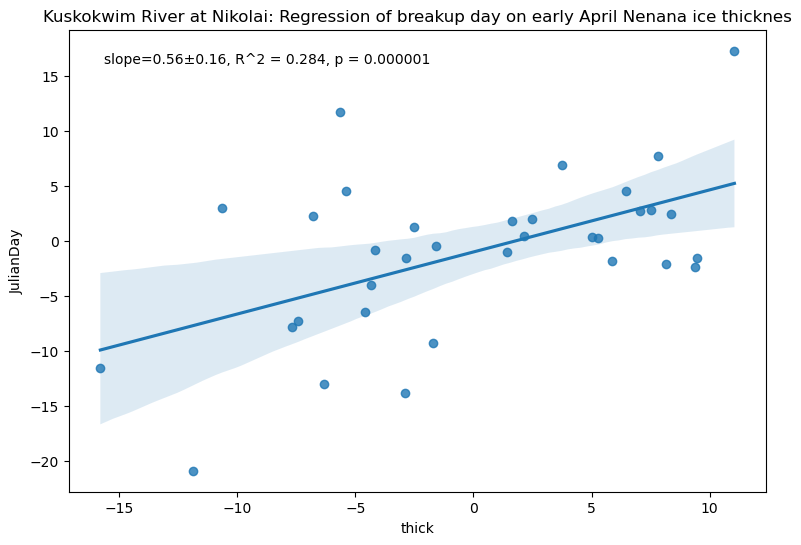

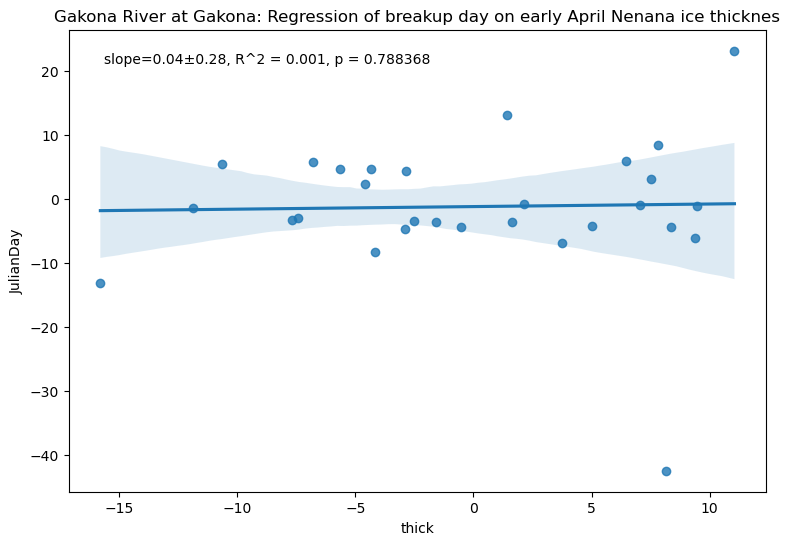

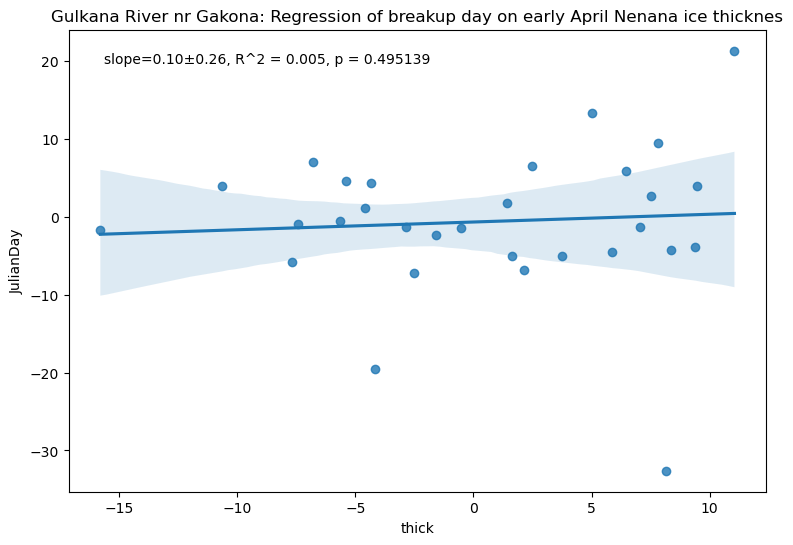

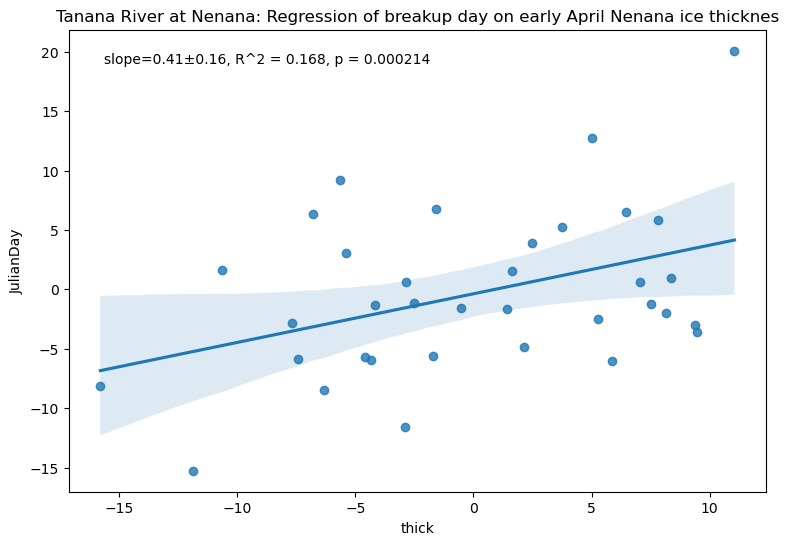

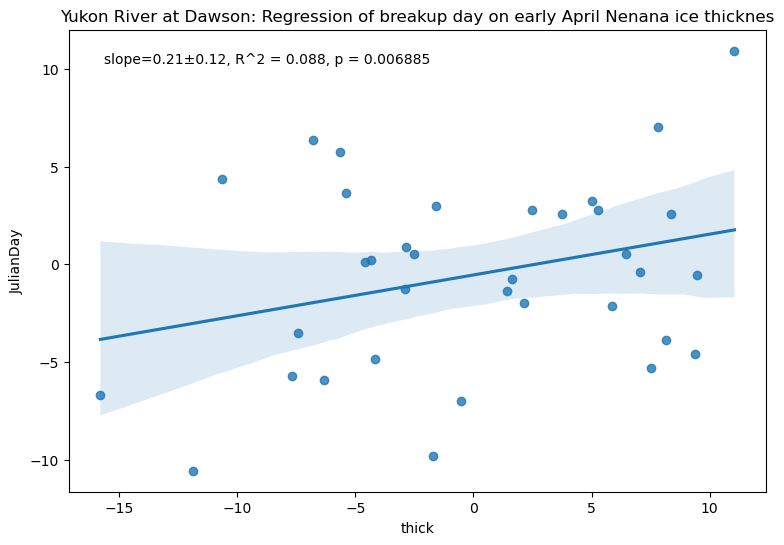

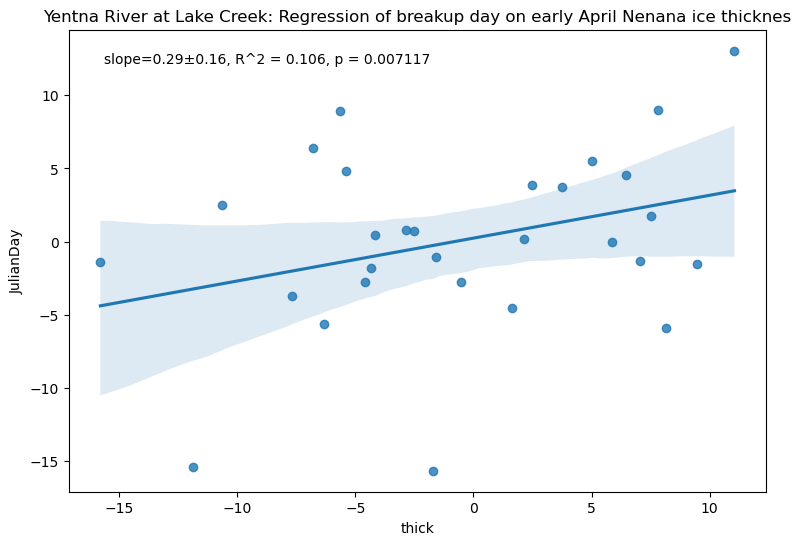

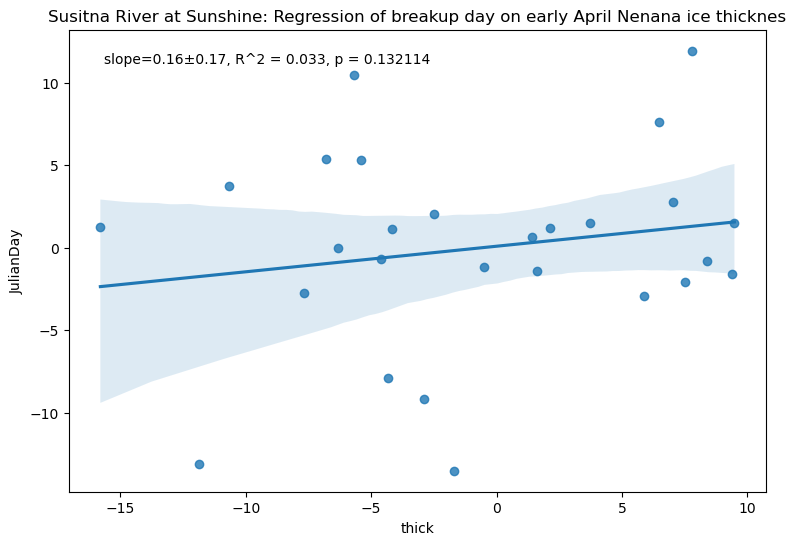

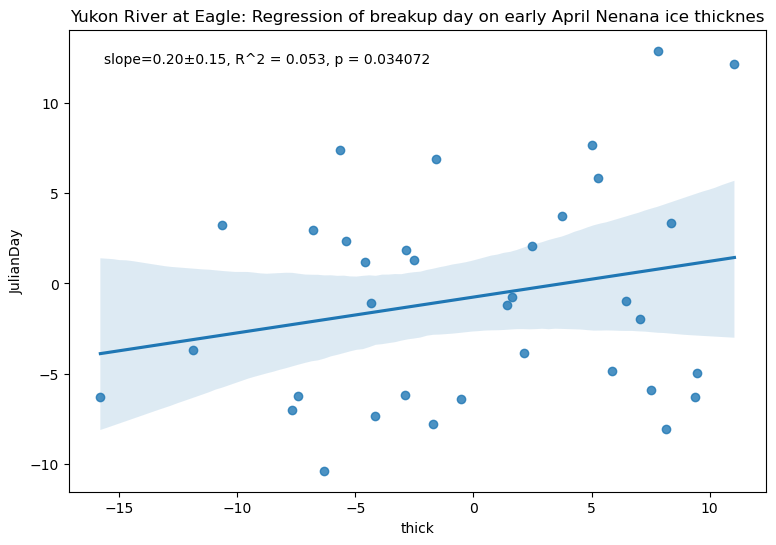

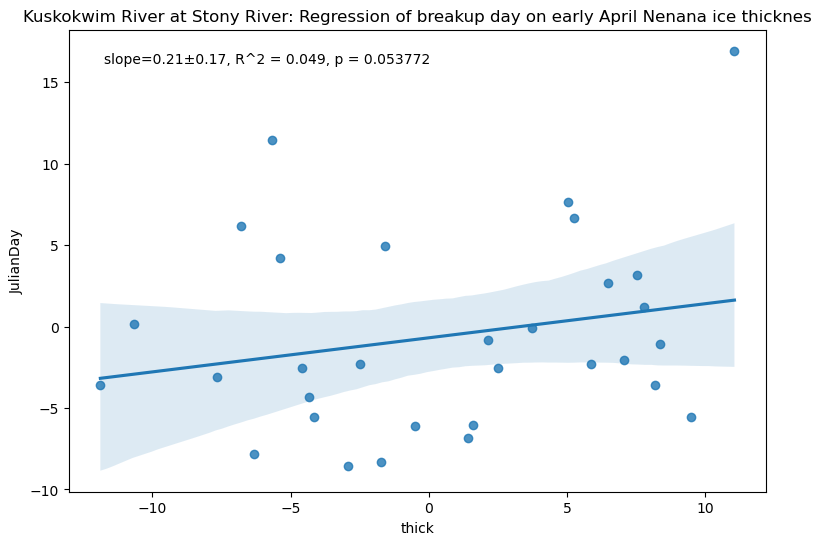

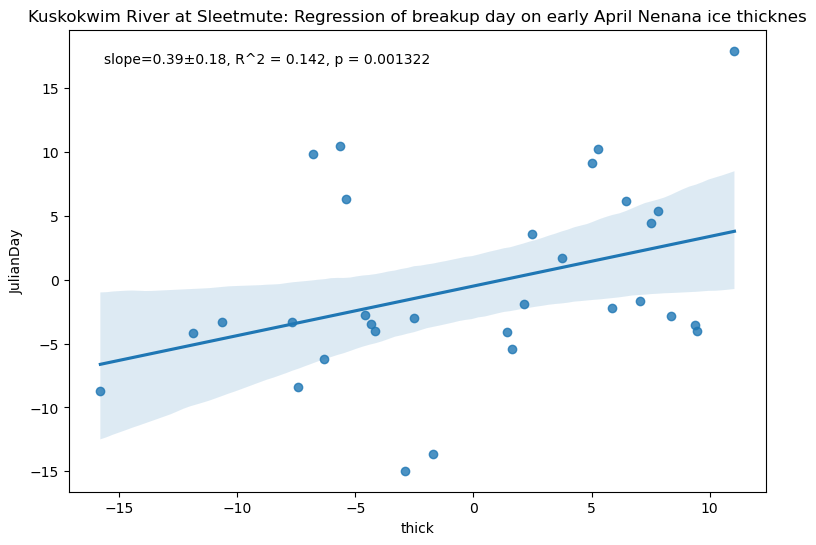

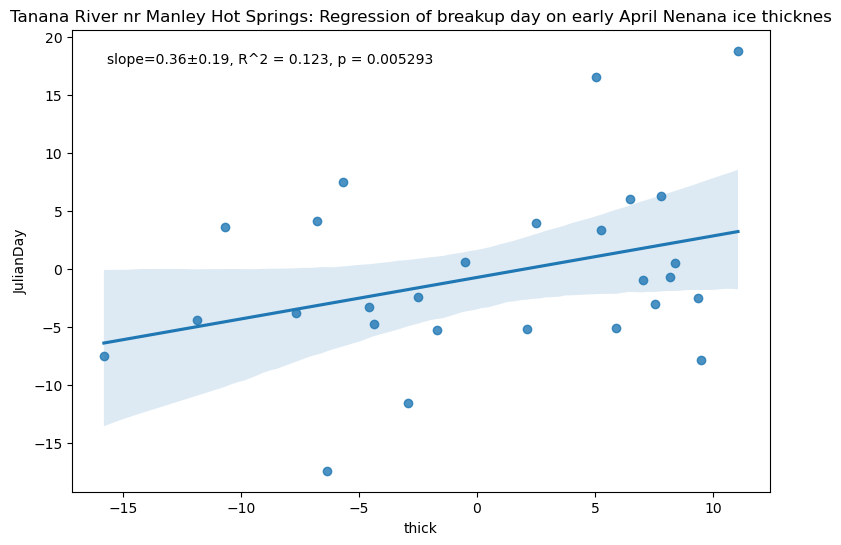

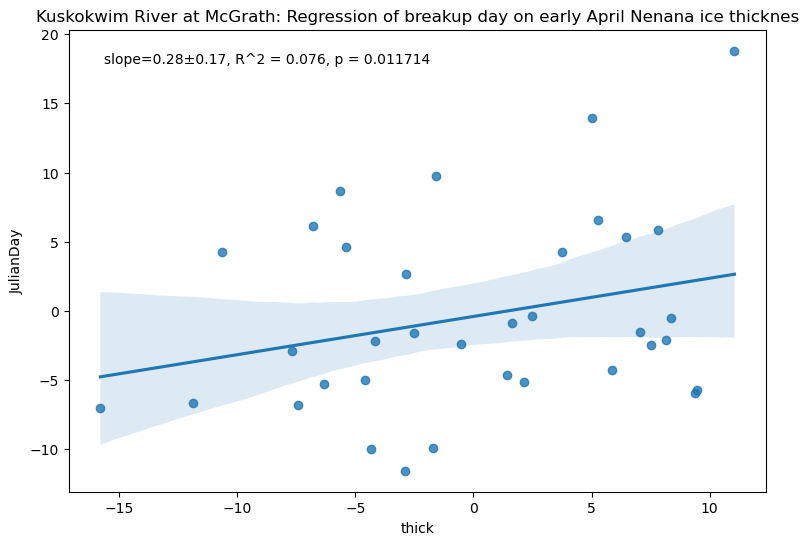

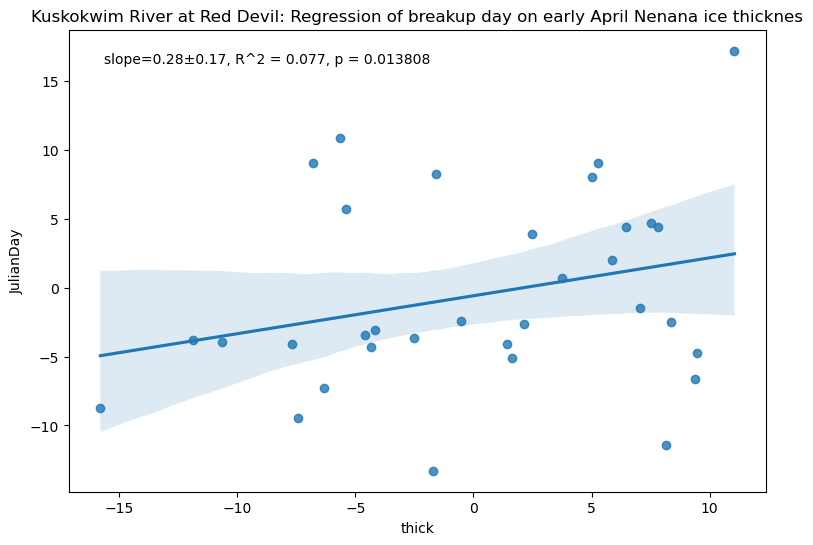

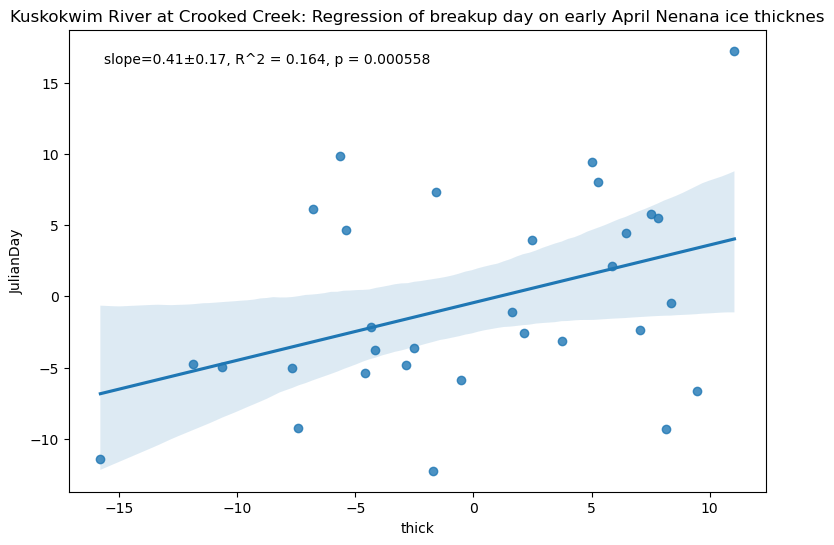

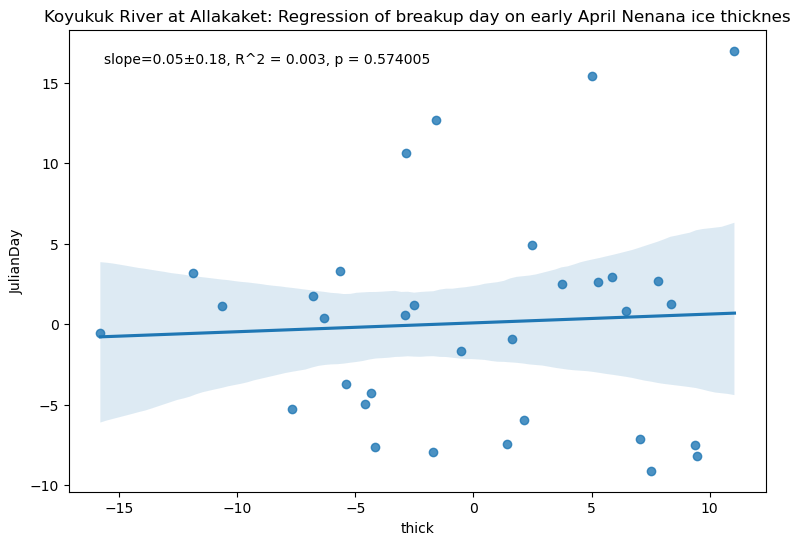

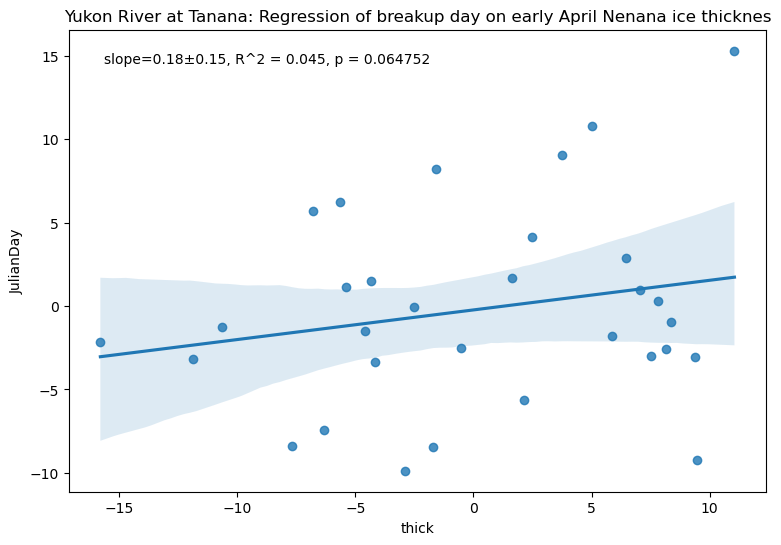

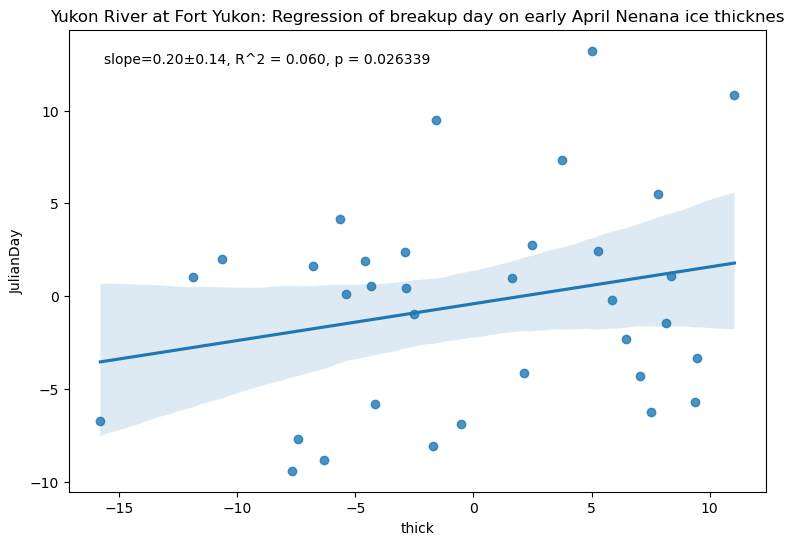

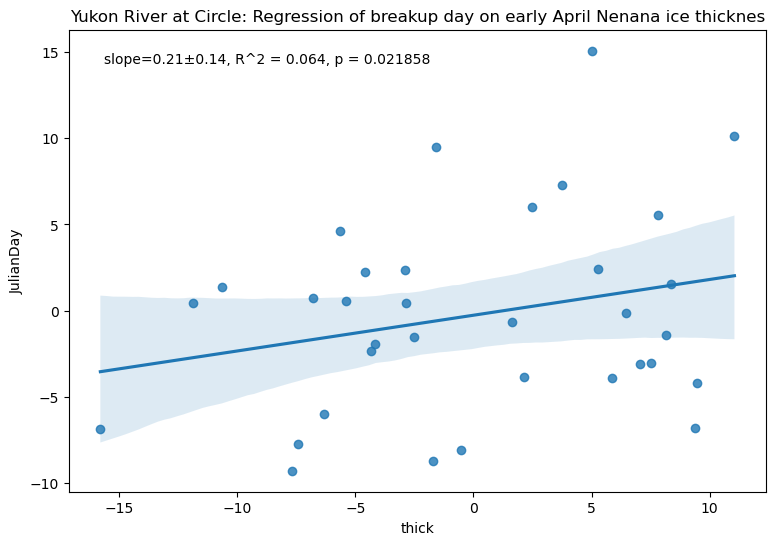

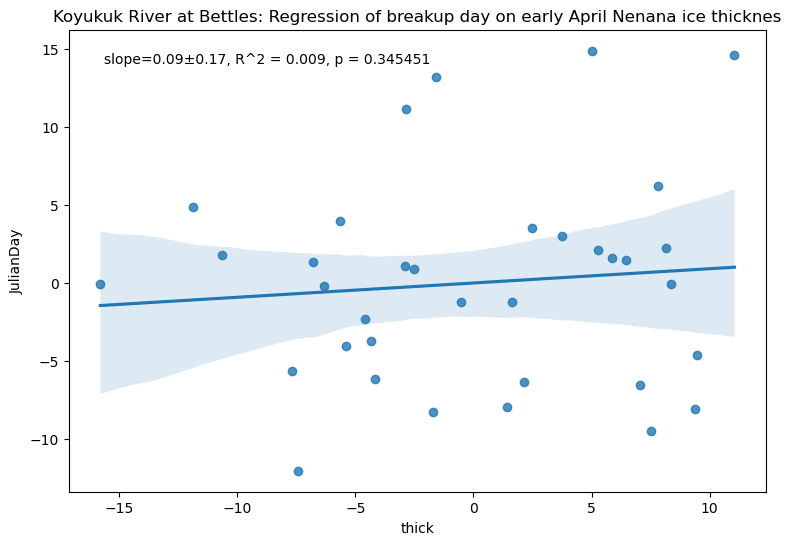

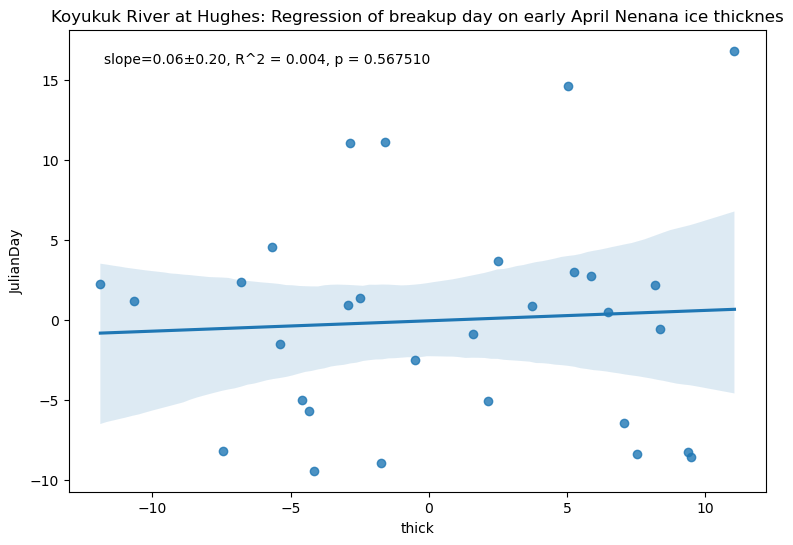

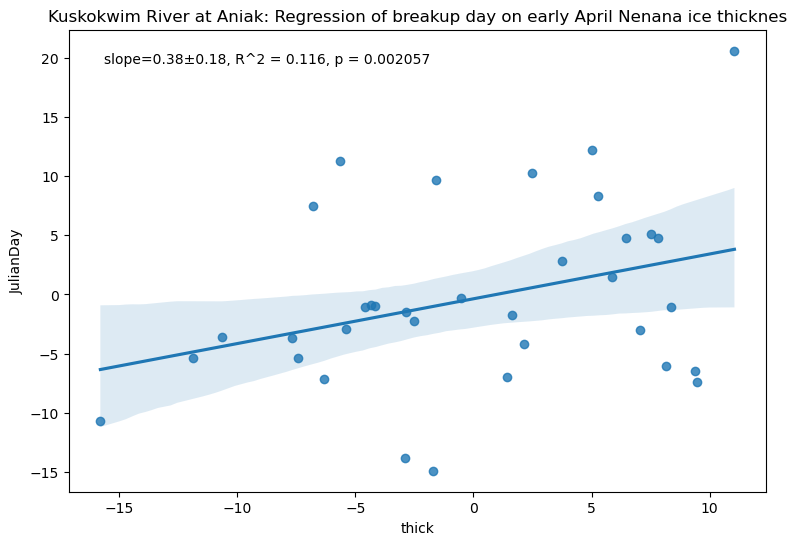

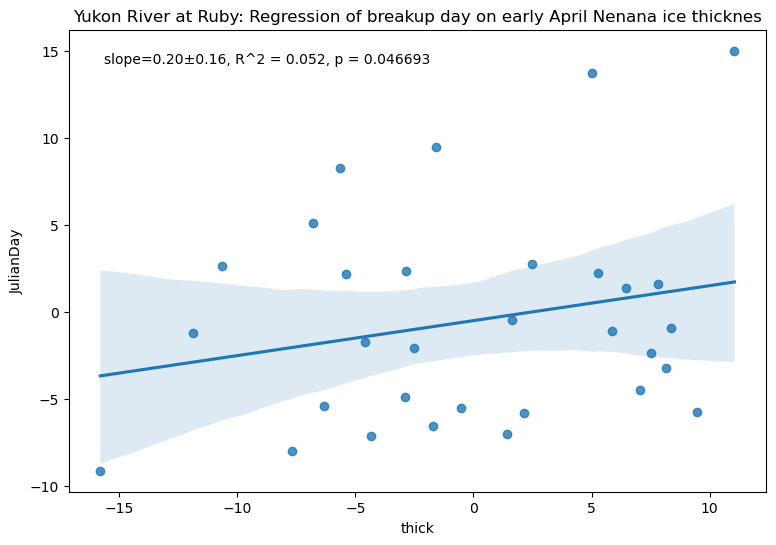

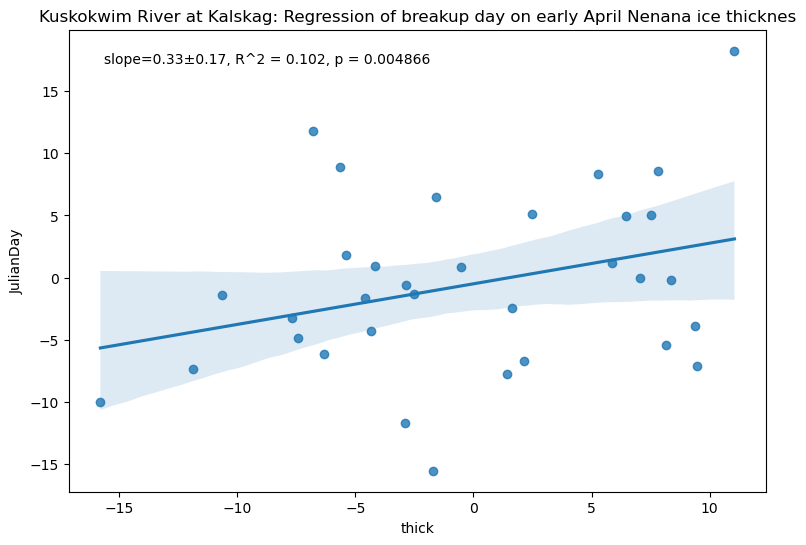

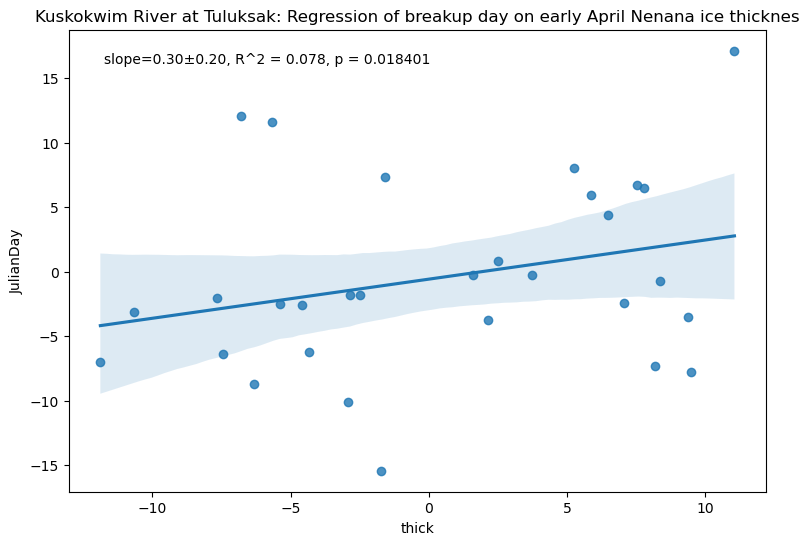

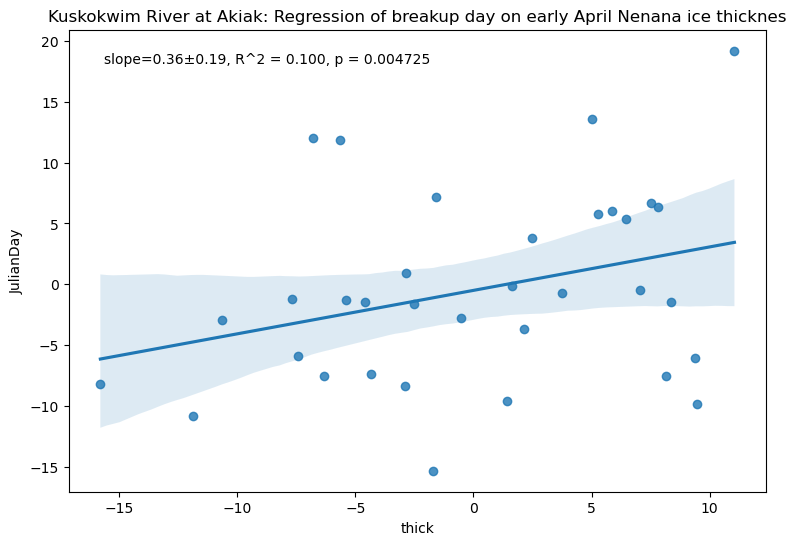

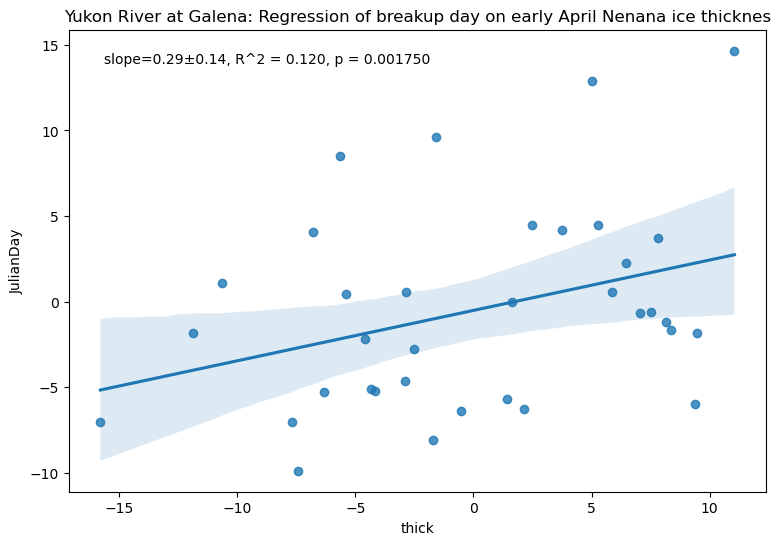

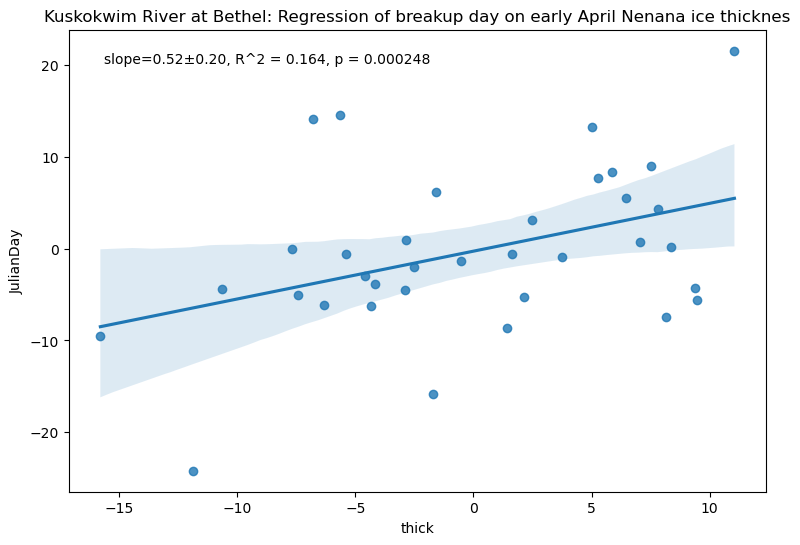

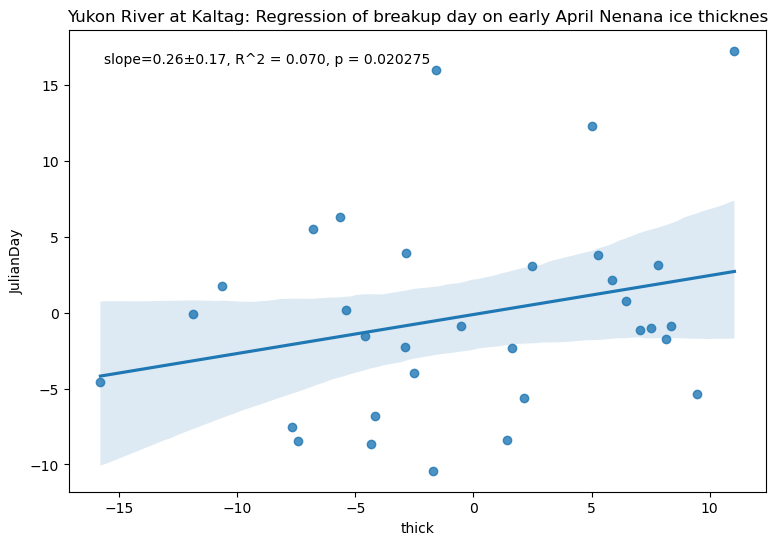

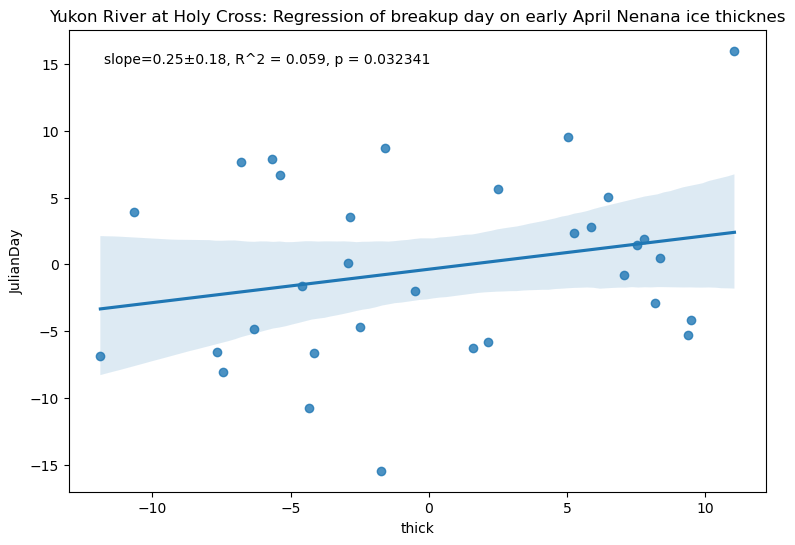

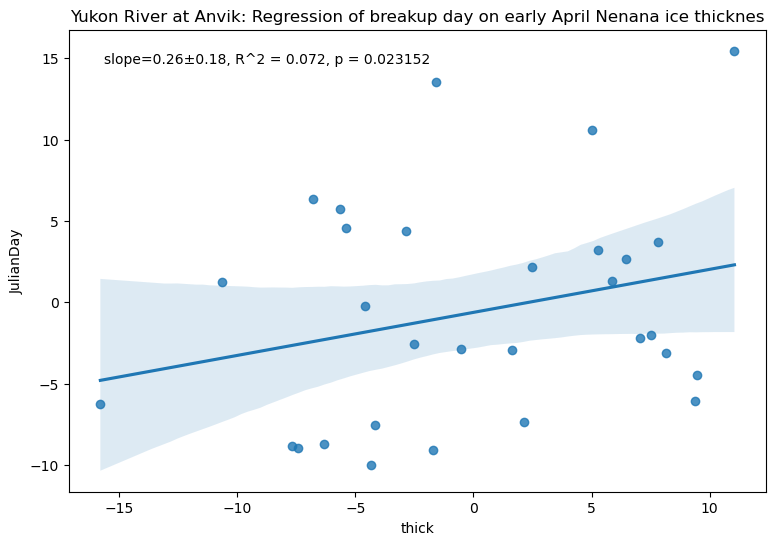

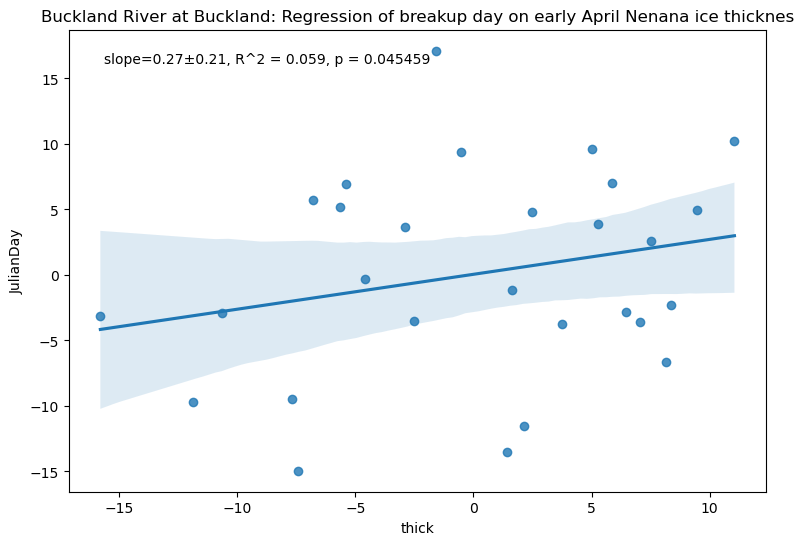

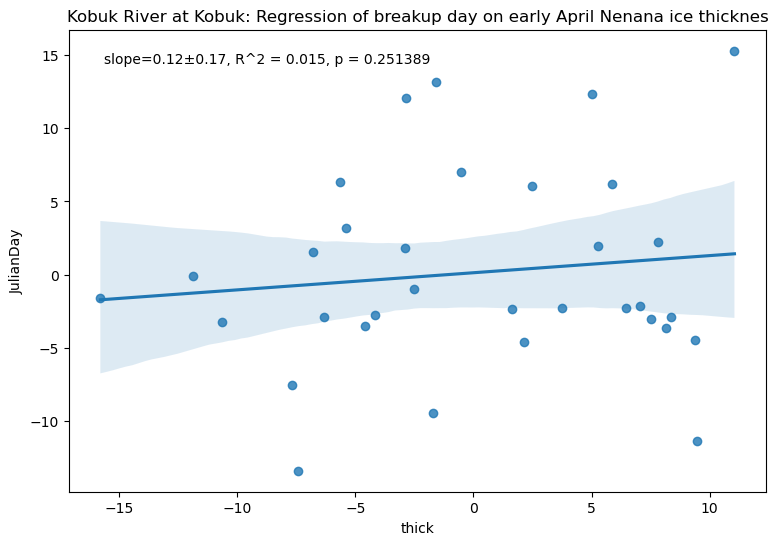

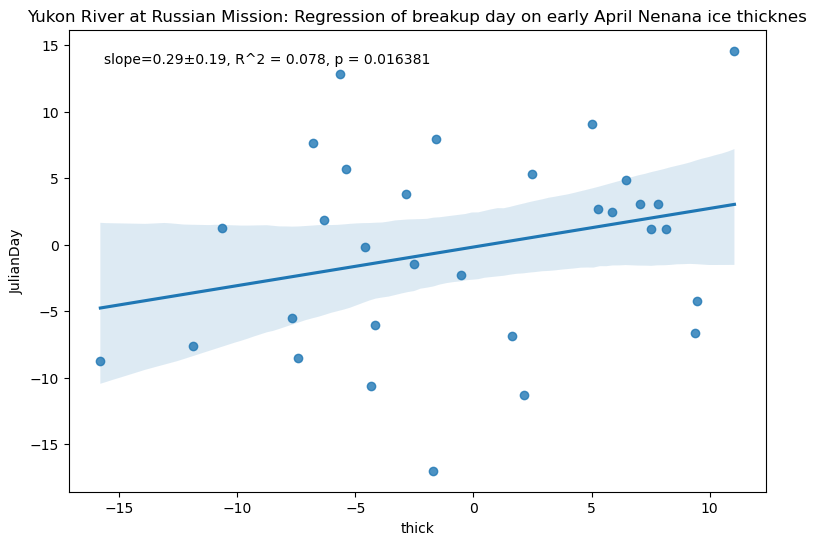

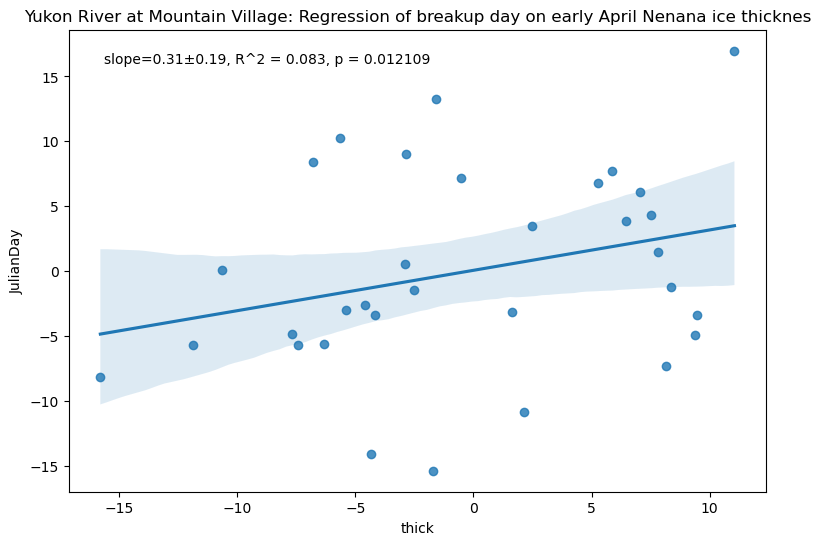

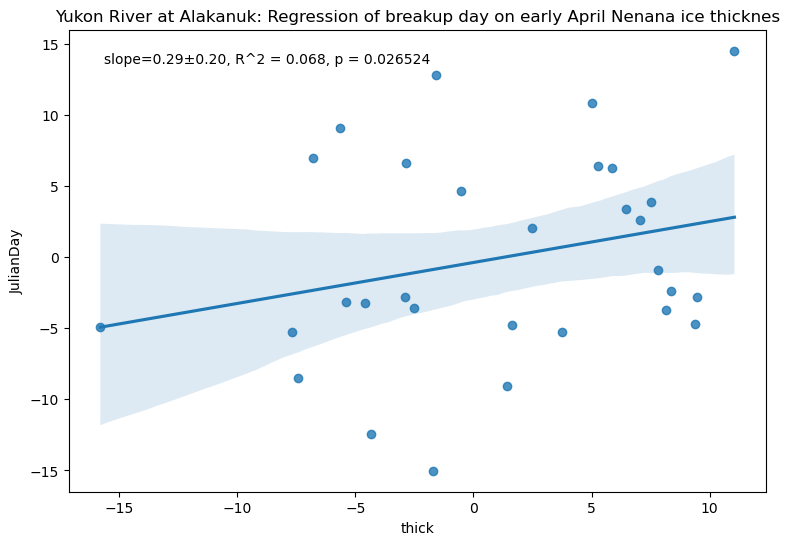

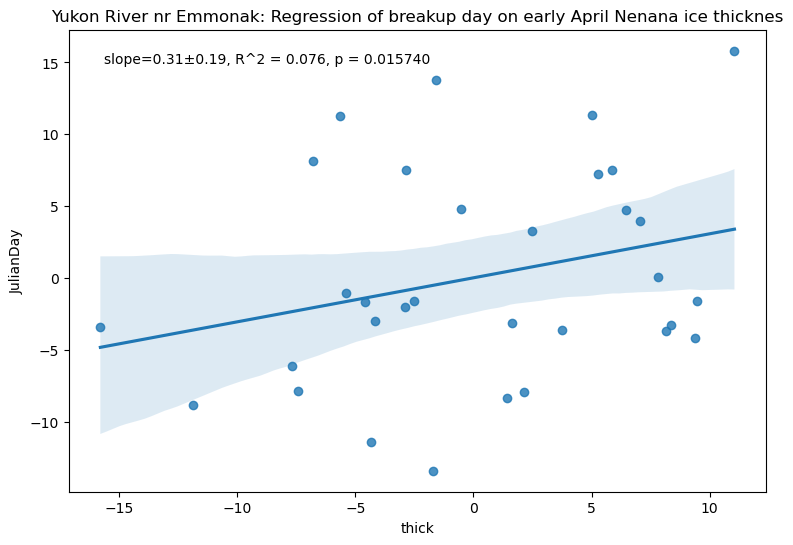

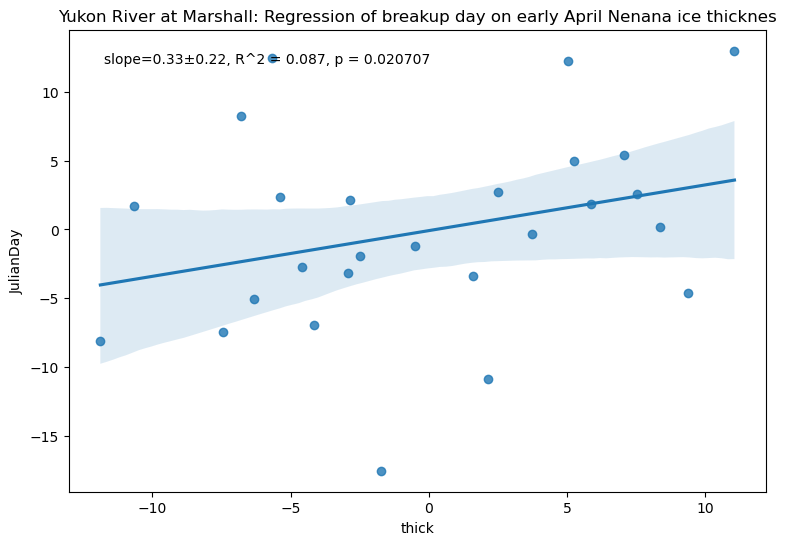

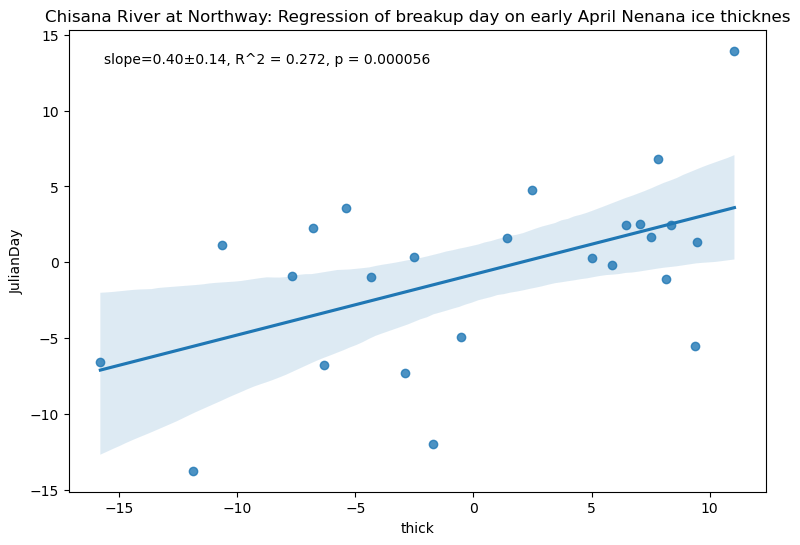

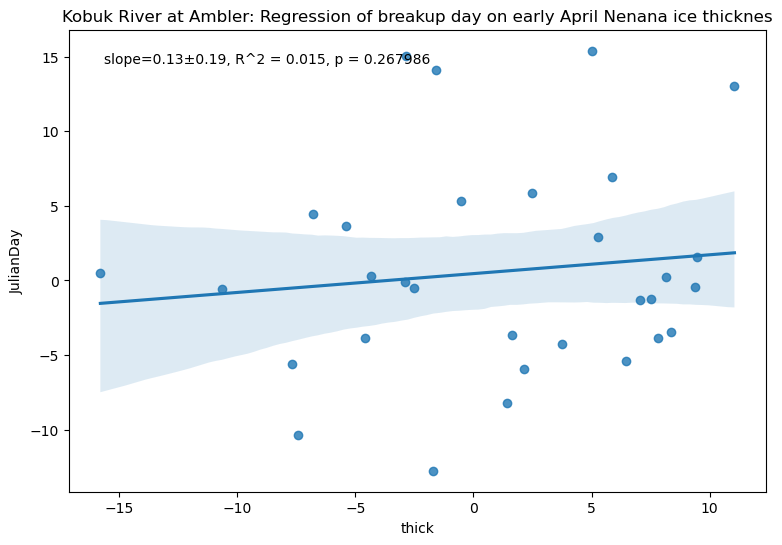

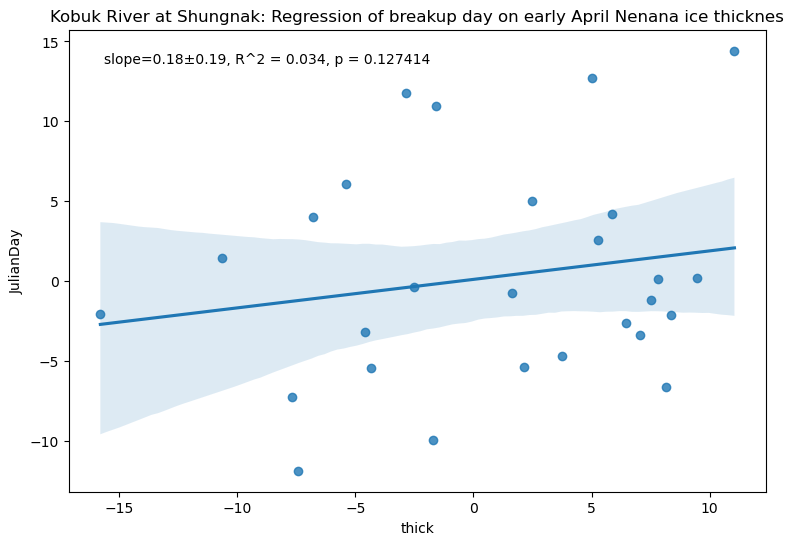

In [ ]:
results = []

for loc in breakup.siteID.unique():
    brk = breakup.copy()
    brk = brk[brk.siteID==loc]
    brk = brk[['year', 'JulianDay']].set_index('year')
    brk['JulianDay'] =  scipy.signal.detrend(brk['JulianDay'], type='linear')

    fig = plt.figure(figsize=(9, 6))
    sns.regplot(data=brk.join(ice).dropna(), x='thick', y='JulianDay')
    plt.title(f"{loc}: Regression of breakup day on early April Nenana ice thicknes")
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
        brk.join(ice).dropna()['thick'], brk.join(ice).dropna()['JulianDay'])
    ax = plt.gca()
    plt.text(.05, .95, f"slope={slope:.2f}±{std_err:.2f}, R^2 = {r_value**2:.3f}, p = {p_value**2:.6f}",
         ha='left', va='top', transform=ax.transAxes)
    plt.show()

    results.append({
        "location": loc,
        "slope": slope,
        "R2":  r_value**2,
        "r_value":  r_value,
        "p_value": p_value,
        "std_err": std_err
    })

In [ ]:
pd.DataFrame.from_records(results)

location     slope        R2   r_value  \
0             Chena River at Fairbanks  0.569245  0.301409  0.549007   
1           Kuskokwim River at Nikolai  0.563589  0.284437  0.533327   
2               Gakona River at Gakona  0.040220  0.000749  0.027375   
3              Gulkana River nr Gakona  0.099616  0.005247  0.072435   
4               Tanana River at Nenana  0.409147  0.167563  0.409345   
5                Yukon River at Dawson  0.208869  0.088313  0.297175   
6           Yentna River at Lake Creek  0.292894  0.106285  0.326014   
7            Susitna River at Sunshine  0.155011  0.033138  0.182038   
8                 Yukon River at Eagle  0.198332  0.052713  0.229592   
9       Kuskokwim River at Stony River  0.209357  0.048902  0.221137   
10        Kuskokwim River at Sleetmute  0.387720  0.142415  0.377380   
11  Tanana River nr Manley Hot Springs  0.358324  0.123102  0.350859   
12          Kuskokwim River at McGrath  0.276107  0.076296  0.276217   
13        Kuskokwim River at Red Devil  0.275553  0.077175  0.277805   
14    Kuskokwim River at Crooked Creek  0.405131  0.164448  0.405522   
15          Koyukuk River at Allakaket  0.054840  0.003117  0.055830   
16               Yukon River at Tanana  0.177574  0.044534  0.211030   
17           Yukon River at Fort Yukon  0.198259  0.060097  0.245148   
18               Yukon River at Circle  0.207445  0.064312  0.253598   
19            Koyukuk River at Bettles  0.091380  0.009000  0.094870   
20             Koyukuk River at Hughes  0.064960  0.003584  0.059866   
21            Kuskokwim River at Aniak  0.378509  0.115917  0.340466   
22                 Yukon River at Ruby  0.201171  0.052263  0.228611   
23          Kuskokwim River at Kalskag  0.326799  0.102191  0.319673   
24         Kuskokwim River at Tuluksak  0.303338  0.077755  0.278846   
25            Kuskokwim River at Akiak  0.356733  0.099804  0.315917   
26               Yukon River at Galena  0.294194  0.119624  0.345867   
27           Kuskokwim River at Bethel  0.521102  0.164201  0.405217   
28               Yukon River at Kaltag  0.256904  0.070333  0.265204   
29           Yukon River at Holy Cross  0.249927  0.059147  0.243201   
30                Yukon River at Anvik  0.264341  0.071832  0.268016   
31          Buckland River at Buckland  0.266380  0.058938  0.242772   
32                Kobuk River at Kobuk  0.116822  0.014708  0.121277   
33      Yukon River at Russian Mission  0.290222  0.078053  0.279379   
34     Yukon River at Mountain Village  0.310499  0.082902  0.287928   
35             Yukon River at Alakanuk  0.288146  0.068349  0.261437   
36              Yukon River nr Emmonak  0.305684  0.076483  0.276556   
37             Yukon River at Marshall  0.332679  0.086843  0.294692   
38           Chisana River at Northway  0.398840  0.272136  0.521666   
39               Kobuk River at Ambler  0.126267  0.014575  0.120728   
40             Kobuk River at Shungnak  0.178326  0.034034  0.184484   

     p_value   std_err  
0   0.003020  0.173326  
1   0.001163  0.158022  
2   0.887901  0.282645  
3   0.703661  0.259215  
4   0.014613  0.158748  
5   0.082977  0.116823  
6   0.084361  0.163453  
7   0.363475  0.167461  
8   0.184587  0.146359  
9   0.231887  0.171451  
10  0.036357  0.176676  
11  0.072752  0.191271  
12  0.108231  0.167239  
13  0.117507  0.171137  
14  0.023617  0.169578  
15  0.757631  0.176146  
16  0.254465  0.152737  
17  0.162292  0.138603  
18  0.147845  0.139878  
19  0.587750  0.166918  
20  0.753332  0.204694  
21  0.045359  0.181967  
22  0.216085  0.159079  
23  0.069756  0.173975  
24  0.135651  0.197427  
25  0.068739  0.189393  
26  0.041835  0.138932  
27  0.015742  0.204658  
28  0.142391  0.170527  
29  0.179837  0.181990  
30  0.152156  0.179572  
31  0.213210  0.208749  
32  0.501387  0.171731  
33  0.127987  0.185221  
34  0.110040  0.188549  
35  0.162861  0.201045  
36  0.125459  0.193933  
37  0.143900  0.220203  
38  0.007484  0.136009  
39  0

In [ ]:
with open(outdir / "corr_IceThickNenana_breakupdate_detrended.csv", "w") as dst:
    dst.write(f"# Correlations from linear regression between last Nenana ice thickness and breakupdate, linear trends removed \n")
    dst.write("# Data sent by Bob Busey, after Nenana Ice Classic site (cleaned up)\n")
    dst.write("# \n")
    pd.DataFrame.from_records(results).to_csv(dst)
